In [8]:
import mod
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt

In [9]:
def solve_1step(alpha,nu,psi,s,vertices,t):
    n=len(vertices)
    
    ## generar matriz
    M=np.zeros((n,n))
    
    for i in range(n):
        vecinos = vertices[i][2:]
        n_vecinos=len(vecinos)
        phi=0
        media = 0
        for vecino in vecinos:
            media+=s[vecino]
        media=media*1.0/n_vecinos

        if s[i] > media:
            phi=nu
        else:
            phi=1-nu
        M[i][i]=(psi*phi-1)*alpha    
        for j in vecinos:
            M[i][j]=alpha*(1.0/n_vecinos)*psi*(1-phi)
            
#     print(M)
        
    val, vec = LA.eig(M)
    A_0=np.zeros((n,n))
    A_1=np.zeros((n,n))
    
    salto=[]
#     t=1
    for i in range(n):
        if i not in salto:
            if np.imag(val[i]) != 0:
                j=np.argwhere(val == np.conj(val[i]))[0][0]
                salto.append(j)
                A_0[:,i]=np.real(vec[:,i])
                A_0[:,j]=np.imag(vec[:,j])
                A_1[:,i]=np.exp(t*np.real(val[i]))*(np.real(vec[:,i])*np.cos(t*np.imag(val[i]))-np.imag(vec[:,i])*np.sin(t*np.imag(val[i])))
                A_1[:,j]=np.exp(t*np.real(val[i]))*(np.real(vec[:,i])*np.sin(t*np.imag(val[i]))+np.imag(vec[:,i])*np.cos(t*np.imag(val[i])))
            else:
                A_0[:,i]=np.real(vec[:,i])
                A_1[:,i]=np.real(vec[:,i])*np.exp(t*np.real(val[i]))
                
    coef=np.linalg.solve(A_0, s)
    x_0=np.dot(A_0,coef)
    solucion=np.dot(A_1,coef)
    
    s = psi * s


    #copia
    scopia=s

    for k in range(n):
        vecinos = vertices[k][2:]
        media = 0
        for vecino in vecinos:
            media+=scopia[vecino]
        media=media*1.0/len(vecinos)

        if scopia[k] > media:
            s[k]=nu*scopia[k]+(1-nu)*media
        else:
            s[k]=(1-nu)*scopia[k]+nu*media
    
    
    
    for k in range(n):
        X = np.random.poisson(vertices[k][1])
        # posicion hubo crimen o no
        I = 0
        if X >= 1:  # si hubo al menos un crimen I=1 de lo contrario I=0
            I = 1
        # efecto del crimen en la percepcion de k para el siguiente periodo
        solucion[k] = I + (1 - I) * solucion[k]
        s[k] = I + (1 - I) * s[k]
    
    
    return solucion, M,s,val,vec

In [10]:
vertices=mod.read("500.graph")[0]
for i in range(len(vertices)):
    if vertices[i][1] == 0:
        vertices[i][1] = 0
#     elif vertices[i][1] == 1:
#         vertices[i][1] = 0.05
    else:
        vertices[i][1] = 0.5
# x_0=np.random.rand(len(vertices))
x_0=np.zeros(len(vertices))

In [11]:
len(vertices)

500

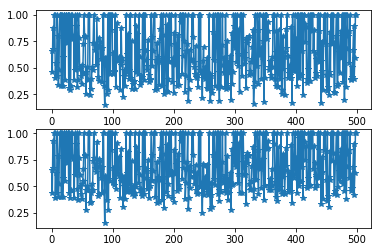

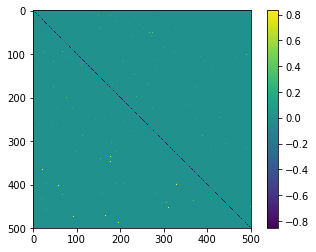

Det:4.236606759623977e-242
[0.663 0.463 0.873 0.682 1.    1.    0.405 0.549 0.424 1.    0.801 0.333
 0.475 1.    1.    1.    0.331 1.    0.33  0.604 1.    1.    0.388 1.
 1.    0.734 1.    1.    0.311 1.    0.286 0.324 1.    0.781 1.    0.771
 0.81  0.382 1.    0.478 0.891 1.    0.314 0.386 1.    0.779 0.484 0.504
 0.424 0.349 0.524 0.447 0.724 1.    0.802 0.793 0.254 0.457 0.508 0.384
 1.    1.    1.    0.243 0.398 0.3   0.505 0.479 0.737 1.    0.737 0.669
 0.712 0.525 0.957 0.7   0.408 0.375 0.781 0.709 0.748 0.585 0.691 0.364
 1.    1.    0.327 0.151 0.595 0.567 0.602 0.251 1.    0.289 1.    1.
 0.44  1.    0.854 1.    0.443 0.637 0.469 0.463 1.    0.322 0.577 0.919
 0.572 0.56  0.592 0.602 0.294 0.53  0.873 0.562 0.59  0.225 0.418 0.482
 0.33  0.439 1.    0.628 0.47  0.819 0.476 0.394 1.    1.    0.405 0.758
 0.299 0.367 0.351 0.379 0.298 1.    0.461 0.892 0.823 0.667 0.445 1.
 0.601 0.337 0.419 0.369 0.409 1.    1.    0.381 1.    1.    0.655 0.574
 0.483 0.52  0.761 0.436 0.367 0.

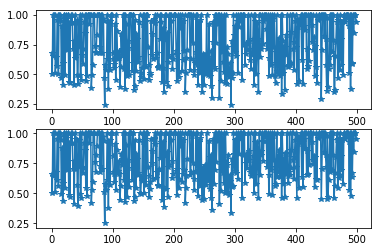

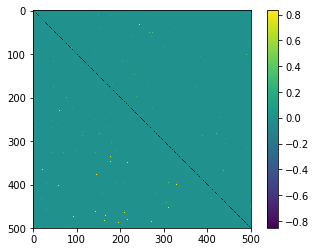

Det:1.711857571129547e-225
[0.677 0.499 1.    0.65  1.    1.    0.508 0.641 0.565 0.956 1.    0.505
 1.    0.968 1.    0.95  0.467 0.904 0.408 0.595 1.    1.    0.49  1.
 0.964 0.7   1.    1.    0.434 0.93  0.427 1.    0.938 1.    0.931 0.71
 0.777 0.409 1.    0.634 0.93  0.953 0.494 0.419 0.954 0.727 1.    0.494
 0.451 1.    0.664 0.59  0.715 0.936 1.    0.843 0.439 1.    0.488 1.
 1.    1.    0.925 1.    1.    0.384 0.495 0.579 1.    1.    1.    0.741
 0.679 0.69  0.832 1.    1.    1.    1.    0.683 0.732 1.    0.681 1.
 0.964 0.944 0.465 0.244 0.58  0.535 0.626 1.    0.945 0.374 0.935 0.948
 0.536 1.    1.    1.    0.675 0.625 0.586 0.553 0.923 0.451 1.    0.864
 0.63  0.638 0.698 0.633 0.395 0.56  0.837 0.713 0.662 1.    0.545 1.
 0.375 1.    0.926 0.598 0.484 0.78  1.    0.49  1.    1.    1.    0.724
 0.528 1.    1.    0.368 0.399 0.955 0.524 0.838 0.793 0.641 0.599 0.943
 1.    0.445 0.473 0.511 0.555 1.    0.915 0.459 1.    0.943 1.    0.56
 1.    1.    0.727 0.575 0.45  0.513 0

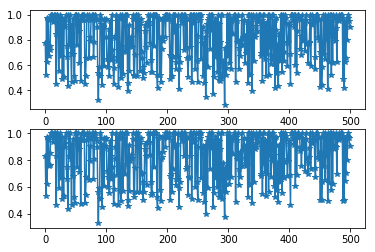

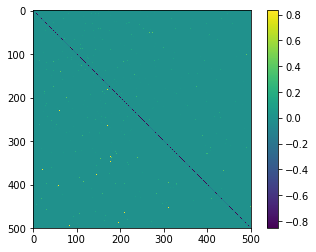

Det:4.75407260559167e-240
[0.779 0.525 0.975 0.627 0.958 0.971 0.676 0.719 0.752 1.    1.    1.
 0.974 0.942 1.    0.952 1.    0.851 0.454 1.    1.    0.976 0.557 0.968
 1.    0.673 0.951 0.976 0.492 0.912 0.509 0.94  0.905 0.974 1.    0.665
 0.752 0.435 1.    0.763 1.    0.922 0.699 0.464 0.929 0.688 0.965 0.517
 0.475 1.    1.    1.    0.759 1.    0.95  0.873 0.614 0.968 0.476 0.958
 1.    1.    1.    0.959 1.    0.45  0.511 0.658 0.957 1.    0.972 1.
 0.655 0.824 0.795 0.963 1.    0.973 1.    0.664 0.785 1.    1.    0.969
 0.957 0.904 0.54  0.32  0.583 0.516 1.    0.966 0.924 0.442 0.904 0.91
 0.594 0.968 0.96  0.967 0.822 0.652 0.646 0.587 0.884 0.515 0.948 0.829
 0.644 1.    0.724 0.664 0.447 0.58  0.813 0.834 1.    0.949 0.634 0.975
 0.427 0.972 1.    0.591 0.499 0.749 1.    0.533 0.966 0.959 1.    0.711
 0.703 1.    1.    0.396 0.46  0.922 0.558 0.798 0.828 0.755 0.742 1.
 0.963 0.521 0.51  0.682 1.    1.    0.884 0.517 1.    0.923 0.959 0.551
 0.935 0.969 0.701 0.659 0.497 0.58

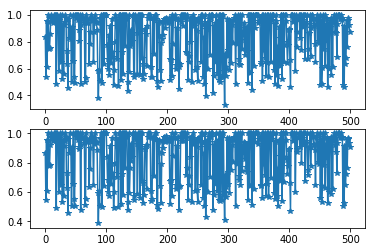

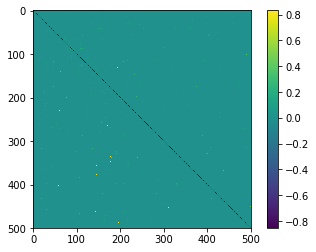

Det:1.4224273352659716e-245
[0.836 0.539 0.954 0.609 1.    0.949 0.746 0.757 0.856 0.976 1.    0.972
 0.952 0.937 1.    0.946 1.    1.    0.488 0.966 1.    0.96  0.583 0.96
 1.    0.651 0.923 1.    0.523 0.932 0.56  0.921 1.    0.95  0.975 0.631
 0.732 0.458 0.967 0.829 1.    0.902 0.819 0.5   0.911 0.658 1.    0.54
 0.495 1.    1.    0.977 1.    0.964 1.    0.887 0.803 1.    0.485 0.927
 1.    0.969 0.971 0.936 0.972 0.499 0.529 1.    0.941 0.97  0.941 0.966
 0.637 0.87  0.782 1.    0.974 0.954 0.964 0.649 0.871 0.967 1.    0.945
 0.939 0.886 0.58  0.378 0.592 0.504 0.973 0.946 1.    0.491 1.    1.
 0.633 1.    1.    1.    1.    0.776 0.673 0.599 0.85  0.549 0.921 0.8
 0.644 0.973 0.72  0.685 0.478 0.591 0.796 1.    0.973 0.916 0.67  0.955
 0.47  1.    1.    1.    0.512 0.724 1.    0.557 1.    1.    1.    0.769
 1.    0.969 0.972 0.43  0.503 1.    0.578 0.766 0.889 0.787 0.804 1.
 1.    0.557 0.537 1.    0.968 0.974 0.868 0.557 1.    0.915 1.    0.554
 1.    1.    0.68  1.    0.524 0.

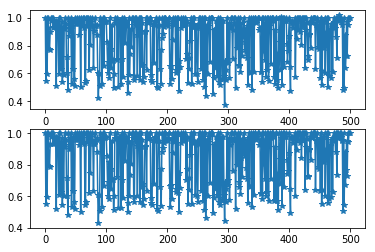

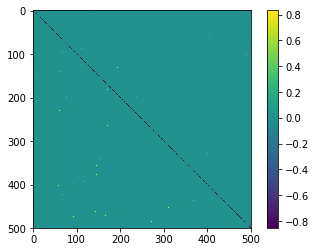

Det:2.7993639550370477e-240
[1.    0.546 1.    0.595 1.    0.93  0.776 0.772 0.9   1.    0.976 1.
 1.    0.93  0.979 0.932 0.971 0.979 0.513 0.938 0.973 0.942 0.599 1.
 1.    0.632 0.915 0.97  0.54  0.933 0.592 0.918 1.    0.929 0.958 0.605
 0.716 0.477 1.    0.871 0.973 0.897 1.    0.526 0.94  0.634 0.978 0.559
 0.51  1.    0.977 0.958 1.    0.955 0.972 1.    0.877 0.974 0.501 1.
 0.976 0.943 1.    0.929 1.    0.533 0.542 1.    1.    0.949 1.    0.94
 0.623 1.    0.804 0.975 0.953 1.    0.937 0.636 0.906 0.943 1.    0.945
 0.953 0.88  0.6   0.421 0.598 0.508 1.    0.939 0.973 0.523 0.975 1.
 0.657 1.    0.973 0.974 0.976 0.824 0.686 0.602 0.82  0.567 1.    0.775
 0.64  0.95  0.706 0.693 0.499 0.598 1.    0.975 0.962 1.    0.695 0.954
 0.502 0.978 0.977 0.976 0.523 0.703 1.    0.573 0.975 1.    0.975 0.816
 0.976 0.946 0.95  0.458 0.535 1.    0.59  0.739 0.921 0.79  1.    1.
 0.975 0.582 0.555 1.    0.947 1.    0.881 0.582 0.976 0.913 1.    0.556
 1.    1.    0.662 0.965 0.54  0.662 0.

In [12]:
a=np.random.rand(len(vertices))
from matplotlib import cm
for i in range(5):
    a,M,s,val,vec=solve_1step(1,0.85,0.98,a,vertices,1)
    plt.subplot(2,1,1)
    plt.plot(a,'-*')
    plt.subplot(2,1,2)
    plt.plot(s,'-*')
    plt.show()
    plt.imshow(M)
    plt.colorbar()
    plt.show()
    
    
    print("Det:"+str(np.linalg.det(M)))
    print(np.around(a,3))
    print(np.around(s,3))
    print(np.around(val,3))
    print(np.around(vec,3))
    

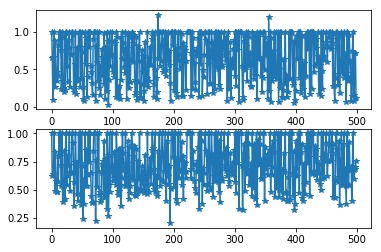

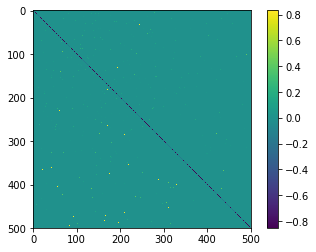

Det:1.7591189592663065e-238
[1.    0.655 0.095 0.661 1.    0.27  0.879 0.412 0.468 0.344 0.822 0.407
 1.    0.896 1.    0.759 0.234 1.    0.239 0.257 0.197 0.944 0.219 1.
 1.    0.552 0.336 0.891 0.786 1.    0.263 0.706 0.695 1.    1.    0.966
 0.193 0.242 0.567 1.    0.167 0.382 0.787 0.349 1.    0.804 1.    0.264
 0.387 1.    0.733 0.263 0.11  0.084 0.805 1.    0.574 0.92  0.129 0.402
 1.    0.802 1.    1.    0.544 0.468 0.32  0.158 0.904 1.    1.    1.
 0.076 0.815 0.599 1.    0.349 1.    0.248 0.553 0.154 0.423 0.778 0.665
 0.486 0.308 0.991 0.787 0.109 0.802 0.214 1.    0.876 0.029 0.355 1.
 0.55  0.68  0.71  1.    0.467 0.518 0.402 0.879 0.852 0.126 1.    0.928
 0.113 0.246 0.285 0.161 0.102 0.931 0.359 0.641 1.    0.852 0.754 0.534
 0.45  1.    0.546 0.107 0.783 0.983 0.252 0.932 0.338 0.333 0.631 1.
 0.975 0.599 0.853 0.958 0.364 0.165 0.204 0.941 0.087 0.331 0.82  0.614
 1.    0.126 0.3   0.115 0.757 0.467 0.68  0.08  0.213 0.866 0.398 0.287
 0.387 1.    0.268 0.343 0.652 0.8 

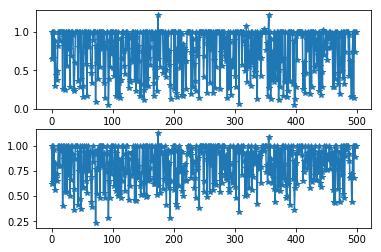

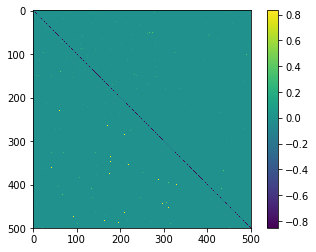

Det:1.0074037704043144e-249
[1.    0.652 1.    0.659 0.996 0.298 0.874 0.437 0.486 0.38  0.819 1.
 1.    0.886 0.995 1.    1.    0.998 0.255 1.    1.    0.936 0.25  1.
 0.996 0.551 1.    1.    0.779 0.995 0.286 1.    0.69  0.992 1.    0.961
 0.23  0.253 0.596 1.    1.    1.    1.    0.356 0.994 0.798 1.    0.283
 0.385 1.    0.735 0.294 0.157 1.    0.8   0.992 0.575 1.    0.167 1.
 0.992 0.797 0.989 0.995 0.558 0.465 0.329 1.    0.897 0.992 0.992 0.994
 0.092 0.81  0.591 0.996 0.389 0.996 1.    0.546 1.    1.    0.78  1.
 1.    0.33  0.985 0.786 0.145 0.796 1.    0.992 0.871 0.054 0.381 0.992
 0.544 1.    0.711 1.    1.    0.525 0.421 0.874 1.    0.163 0.993 0.919
 0.147 1.    0.34  0.196 0.146 0.923 0.371 0.642 1.    1.    0.748 0.558
 0.449 0.982 1.    1.    0.778 0.975 0.269 0.924 0.376 0.352 0.638 0.994
 0.969 0.603 1.    0.944 0.37  1.    0.226 0.932 1.    0.366 0.816 0.621
 1.    0.168 0.319 0.163 0.754 1.    1.    0.112 0.247 1.    1.    0.3
 0.399 1.    0.301 1.    0.654 0.797 

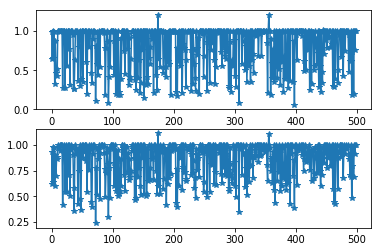

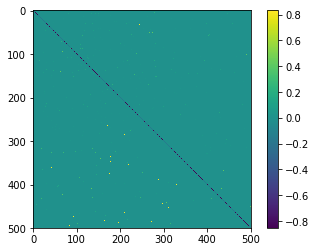

Det:1.5879559210163085e-258
[0.993 0.649 0.998 0.656 0.994 0.327 0.877 0.462 0.522 0.428 1.    0.997
 0.998 1.    0.99  1.    1.    1.    0.27  0.995 0.997 1.    0.278 1.
 0.992 0.55  0.996 1.    0.773 1.    0.307 0.995 1.    0.99  0.998 0.955
 0.264 0.263 0.626 1.    0.996 0.994 0.995 0.363 0.992 0.793 1.    0.301
 0.383 0.997 1.    0.349 1.    0.994 1.    1.    0.602 1.    0.203 0.995
 0.988 0.793 1.    0.991 1.    0.462 0.337 1.    0.898 1.    0.99  0.992
 0.106 0.807 0.584 0.992 0.435 0.994 1.    0.539 0.992 1.    1.    1.
 0.998 1.    0.979 0.784 0.179 0.79  0.997 0.985 0.866 0.077 0.419 0.99
 0.538 1.    1.    1.    0.996 1.    0.439 0.869 1.    0.198 0.988 0.91
 0.178 0.996 0.39  0.228 0.186 0.916 0.393 1.    1.    0.997 0.743 1.
 0.448 0.975 0.998 0.998 0.773 0.968 0.309 0.917 0.411 0.378 0.648 0.989
 1.    1.    0.995 0.931 0.375 1.    0.249 0.923 1.    0.397 1.    0.634
 1.    0.207 0.336 1.    0.762 1.    0.996 0.143 1.    0.996 0.996 0.313
 0.411 0.997 0.33  1.    0.656 0.7

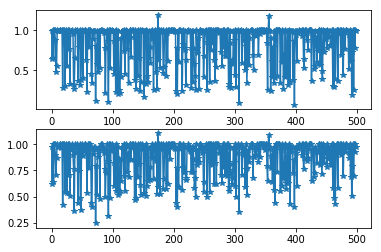

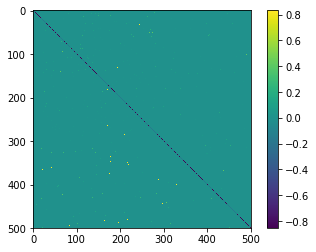

Det:4.9152873245371905e-264
[0.992 0.647 1.    0.654 1.    1.    0.88  0.485 0.555 1.    0.998 0.995
 0.996 1.    1.    0.997 0.997 1.    0.285 1.    0.995 1.    0.304 0.998
 1.    0.549 1.    0.994 0.766 1.    0.327 0.993 0.995 0.989 1.    0.949
 0.311 0.272 0.655 1.    0.995 0.99  1.    0.37  0.99  0.788 1.    0.317
 0.381 1.    0.998 0.4   0.998 0.988 1.    1.    0.632 0.997 0.235 1.
 0.986 0.791 1.    1.    0.997 0.459 0.345 0.996 0.899 0.996 0.989 0.991
 0.12  0.807 0.577 0.988 0.477 0.992 0.996 0.533 0.989 1.    0.996 1.
 0.996 0.996 0.973 0.782 0.211 0.784 1.    0.981 0.864 0.1   1.    1.
 0.533 0.994 0.998 1.    0.993 0.998 0.455 0.864 0.994 0.23  1.    0.902
 0.208 0.993 0.435 0.258 0.222 0.909 0.419 0.998 0.997 0.995 0.738 1.
 0.448 0.968 1.    0.996 0.769 0.961 0.346 0.91  1.    1.    0.668 1.
 0.996 0.998 1.    0.918 0.381 1.    0.271 0.915 0.997 0.426 1.    0.649
 1.    0.243 0.352 0.994 1.    0.998 0.993 0.171 0.996 0.992 1.    0.326
 0.431 0.994 0.357 0.997 0.658 0.791 0

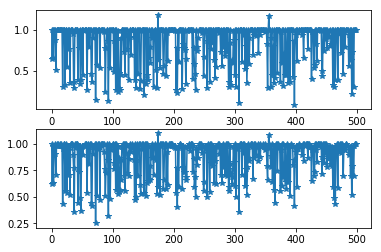

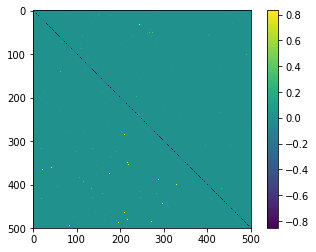

Det:2.3246037793023976e-272
[1.    0.644 0.998 0.652 0.998 1.    0.881 0.507 1.    0.998 0.996 1.
 0.994 1.    0.998 0.995 1.    0.998 0.299 0.995 1.    1.    0.327 0.996
 1.    0.548 0.998 0.989 0.76  0.997 0.345 1.    1.    1.    1.    0.944
 0.355 0.28  1.    0.996 1.    1.    1.    0.378 0.989 0.783 0.998 0.333
 0.38  0.997 0.996 0.447 0.996 0.987 0.998 1.    1.    1.    0.264 0.997
 1.    0.793 0.996 1.    1.    0.457 0.353 0.994 0.899 0.994 0.988 1.
 0.133 1.    0.57  0.985 1.    1.    0.994 0.527 0.986 1.    1.    1.
 1.    1.    0.968 0.78  0.241 0.778 0.997 1.    0.862 0.122 1.    0.998
 0.528 0.989 0.996 0.998 1.    1.    0.484 0.86  1.    0.259 1.    0.895
 0.236 0.991 0.476 0.286 0.255 0.903 0.443 0.996 0.995 1.    0.733 1.
 0.45  1.    1.    0.994 0.764 0.955 0.381 0.903 1.    0.996 0.693 1.
 0.992 0.996 0.996 0.907 0.387 1.    0.291 0.907 1.    0.453 0.997 1.
 1.    0.275 0.366 0.989 1.    0.996 1.    0.198 0.993 1.    1.    0.338
 0.451 1.    0.382 0.993 0.66  0.788 0.59

In [13]:
a=np.random.rand(len(vertices))
from matplotlib import cm
for i in range(5):
    a,M,s,val,vec=solve_1step(1,0.85,0.98,a,vertices,0.1)
    plt.subplot(2,1,1)
    plt.plot(a,'-*')
    plt.subplot(2,1,2)
    plt.plot(s,'-*')
    plt.show()
    plt.imshow(M)
    plt.colorbar()
    plt.show()
    
    
    print("Det:"+str(np.linalg.det(M)))
    print(np.around(a,3))
    print(np.around(s,3))
    print(np.around(val,3))
    print(np.around(vec,3))
    

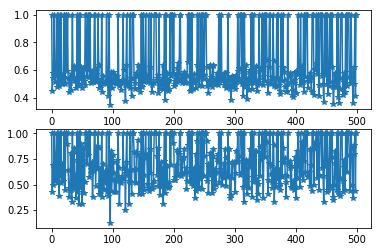

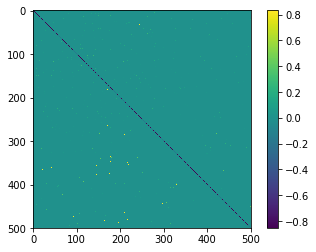

Det:9.918502587103581e-243
[1.    0.452 0.579 0.543 1.    0.512 0.564 0.586 1.    0.475 0.52  1.
 0.484 1.    0.526 1.    0.569 0.497 0.508 0.549 1.    1.    0.499 1.
 1.    0.595 1.    0.534 0.541 0.439 0.509 0.57  0.459 0.55  1.    0.537
 0.609 0.633 0.519 0.53  0.47  0.545 1.    0.494 1.    0.499 1.    0.536
 0.624 0.59  0.473 0.559 0.61  0.519 0.49  1.    1.    0.632 0.548 1.
 0.601 1.    0.547 1.    0.511 0.509 0.596 0.511 0.523 0.54  1.    1.
 0.511 0.569 0.618 0.538 1.    0.638 0.468 0.523 0.517 0.491 1.    0.444
 0.559 0.517 0.506 0.506 0.514 0.498 1.    0.517 0.539 0.415 1.    0.539
 0.35  0.589 0.512 0.471 0.507 0.585 0.523 0.516 0.564 0.497 0.522 0.558
 0.518 1.    0.508 0.484 0.503 0.512 0.458 0.52  0.525 1.    0.601 0.522
 0.49  0.373 0.634 1.    0.501 0.5   0.519 0.484 1.    0.467 0.544 0.416
 1.    1.    1.    0.54  0.461 0.508 0.566 0.58  0.555 0.636 0.556 0.469
 0.445 0.618 0.487 1.    0.481 1.    1.    0.516 0.526 0.541 1.    0.566
 0.547 0.542 0.514 1.    0.532 0.625

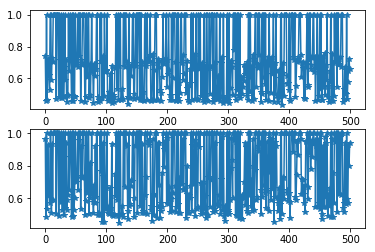

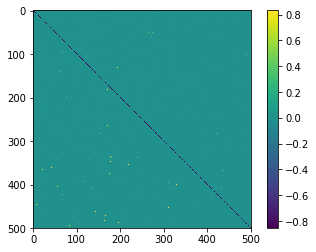

Det:4.460400131533466e-211
[0.744 0.46  1.    0.462 0.72  0.693 0.621 0.528 1.    1.    0.592 0.73
 0.701 1.    1.    1.    1.    1.    0.467 1.    1.    1.    0.481 1.
 0.714 0.475 1.    0.701 0.475 1.    0.485 0.669 1.    0.589 0.713 0.452
 0.486 0.497 1.    0.646 0.727 1.    0.751 0.459 1.    0.458 1.    0.489
 0.483 1.    0.682 0.695 0.697 1.    0.669 1.    0.743 1.    0.457 0.713
 0.686 1.    1.    1.    0.699 0.45  0.484 1.    0.609 0.625 1.    1.
 0.478 0.688 0.495 0.674 1.    0.643 0.637 0.444 0.691 0.616 0.692 0.659
 1.    1.    0.485 0.452 0.466 0.458 1.    0.708 1.    0.477 0.738 0.691
 0.488 1.    0.64  0.652 0.647 1.    0.49  0.457 0.513 0.462 0.629 0.469
 0.463 0.681 0.443 0.496 0.452 0.483 0.663 0.663 1.    0.675 0.536 1.
 0.463 0.675 1.    1.    0.465 0.471 0.534 0.472 1.    1.    0.672 1.
 1.    0.709 0.694 0.438 0.48  1.    0.476 0.478 0.682 0.618 0.675 1.
 1.    0.502 0.469 0.699 1.    0.678 1.    0.477 1.    1.    1.    0.462
 1.    1.    0.465 0.704 0.466 0.516 0.4

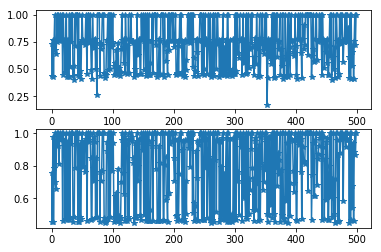

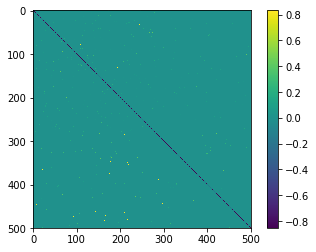

Det:1.372580972381519e-183
[0.729 0.438 0.768 0.43  0.758 1.    0.675 0.637 0.749 1.    0.776 1.
 0.762 0.78  1.    0.764 0.776 1.    0.449 1.    0.773 0.742 0.469 0.778
 1.    0.43  0.765 0.76  0.431 1.    0.519 1.    0.75  1.    1.    0.44
 0.53  0.402 1.    0.71  1.    1.    1.    0.444 1.    0.441 0.748 0.48
 0.408 0.769 1.    0.769 0.755 0.748 0.72  0.762 1.    0.768 0.451 1.
 1.    0.74  0.756 1.    0.755 0.491 0.412 1.    0.75  0.697 0.765 0.775
 0.503 0.741 0.258 1.    1.    1.    1.    0.44  0.743 0.69  0.723 1.
 1.    1.    0.465 0.419 0.455 0.443 0.764 0.766 1.    0.488 1.    1.
 0.498 0.707 1.    0.751 1.    0.73  0.533 0.446 0.553 0.457 0.675 0.525
 0.449 0.74  0.46  0.507 0.44  0.47  0.684 1.    0.769 0.708 0.56  0.775
 0.465 1.    0.779 0.712 0.459 0.469 1.    0.462 0.773 0.759 1.    0.76
 0.755 0.762 0.739 0.431 0.501 0.747 0.459 0.445 1.    0.628 0.748 0.773
 0.778 0.454 0.457 1.    0.767 0.774 1.    0.492 0.763 1.    0.772 0.434
 1.    0.766 0.444 1.    0.443 0.56  0.

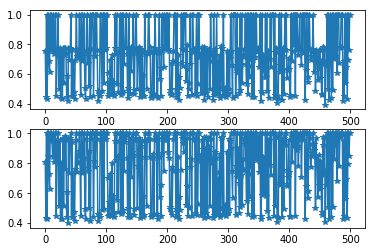

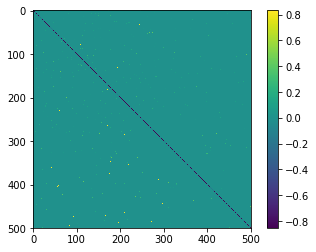

Det:4.166424045615455e-178
[0.756 0.444 1.    0.435 0.758 1.    0.691 0.613 1.    0.77  1.    0.763
 0.754 1.    0.78  0.735 1.    1.    0.454 0.747 0.763 1.    0.497 0.732
 0.774 0.437 0.751 0.736 0.431 0.773 0.542 0.773 0.728 0.775 0.746 0.447
 0.586 0.42  0.777 0.697 0.774 0.76  1.    0.45  0.759 0.449 0.683 0.478
 0.43  0.695 0.771 1.    0.721 0.754 0.73  0.764 1.    0.702 0.459 1.
 1.    0.685 0.719 1.    0.75  0.503 0.43  0.753 1.    1.    0.672 0.766
 0.519 1.    0.448 0.772 1.    1.    1.    0.45  0.72  1.    0.719 1.
 1.    0.766 0.484 0.416 0.468 0.452 1.    1.    0.75  0.485 1.    1.
 0.542 1.    0.763 1.    0.775 1.    0.606 0.454 0.55  0.464 0.696 0.569
 0.462 0.727 0.462 0.547 0.449 0.466 1.    0.776 0.738 1.    0.53  0.752
 0.481 0.755 1.    1.    0.46  0.473 1.    0.486 1.    0.665 0.775 0.78
 1.    1.    0.733 0.438 0.508 1.    0.475 0.465 0.781 0.621 0.742 0.742
 1.    0.49  0.467 0.77  1.    1.    0.76  0.498 0.729 0.783 0.733 0.444
 0.759 0.768 0.46  0.751 0.452 0.5

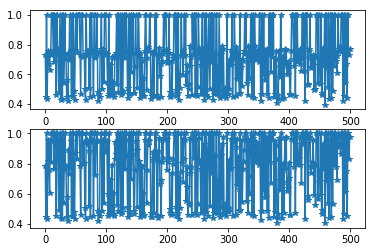

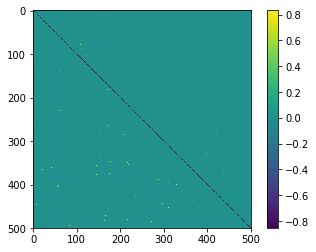

Det:2.3871306008206666e-175
[0.729 0.444 1.    0.432 0.731 0.754 0.672 0.626 0.758 0.732 1.    1.
 1.    0.758 0.685 1.    0.76  1.    0.459 1.    0.744 0.768 0.483 0.762
 1.    0.428 0.74  1.    0.432 1.    0.544 0.713 1.    0.701 0.728 0.449
 0.561 0.42  0.745 0.699 1.    0.716 0.762 0.453 1.    0.451 1.    0.484
 0.429 0.765 1.    1.    0.749 1.    1.    1.    1.    0.729 0.467 1.
 1.    1.    0.714 0.729 0.723 0.5   0.429 1.    0.731 0.755 0.756 0.73
 0.509 1.    0.445 1.    1.    0.743 0.753 0.45  1.    1.    0.71  0.754
 0.738 1.    0.478 0.417 0.468 0.446 0.754 0.769 1.    0.498 0.773 0.73
 0.545 1.    1.    1.    0.74  0.733 0.541 0.454 1.    0.468 0.663 0.551
 0.46  0.718 0.462 0.55  0.445 0.472 0.709 0.727 0.743 1.    0.536 1.
 0.479 0.727 0.754 1.    0.463 0.472 1.    0.488 0.755 1.    1.    0.708
 0.747 1.    0.752 0.436 0.504 1.    0.469 0.466 1.    0.613 0.742 1.
 1.    0.474 0.47  0.651 1.    0.742 0.768 0.505 1.    1.    0.729 0.439
 0.745 0.712 0.462 0.689 0.454 0.576 

In [14]:
a=np.random.rand(len(vertices))
from matplotlib import cm
for i in range(5):
    a,M,s,val,vec=solve_1step(1,0.85,0.98,a,vertices,10)
    plt.subplot(2,1,1)
    plt.plot(a,'-*')
    plt.subplot(2,1,2)
    plt.plot(s,'-*')
    plt.show()
    plt.imshow(M)
    plt.colorbar()
    plt.show()
    
    
    print("Det:"+str(np.linalg.det(M)))
    print(np.around(a,3))
    print(np.around(s,3))
    print(np.around(val,3))
    print(np.around(vec,3))
    

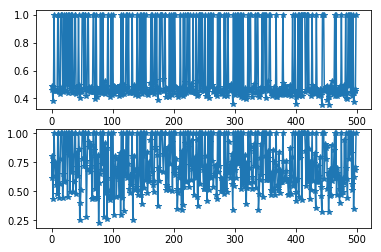

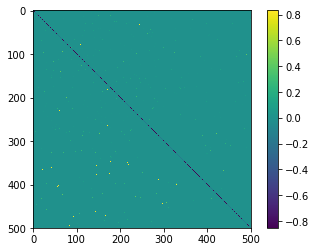

Det:9.925124513682163e-243
[0.46  0.487 0.385 0.483 1.    0.461 0.456 0.45  0.462 0.454 1.    1.
 0.447 0.434 0.486 1.    1.    1.    0.452 0.446 1.    0.459 0.453 1.
 1.    0.502 0.442 1.    0.495 1.    0.466 1.    1.    0.439 1.    0.448
 0.448 0.479 1.    1.    0.433 0.47  0.446 0.488 1.    0.494 0.404 0.449
 0.471 0.445 1.    1.    1.    0.475 1.    1.    0.464 0.42  0.455 1.
 1.    0.472 0.478 0.447 0.449 0.484 0.467 0.449 1.    1.    0.446 0.399
 0.482 1.    0.41  0.45  0.464 0.442 0.465 0.463 1.    0.44  1.    0.454
 1.    0.467 0.437 0.525 0.43  0.486 0.483 0.443 1.    0.463 0.437 0.441
 0.411 1.    0.445 0.427 1.    0.47  0.432 0.486 0.481 0.458 0.451 0.453
 0.463 0.485 0.484 0.415 0.494 0.428 1.    0.467 0.431 1.    0.428 0.493
 0.465 0.468 1.    1.    0.447 0.483 1.    0.44  0.448 0.442 0.448 0.443
 1.    0.439 0.452 0.496 0.475 0.428 0.469 0.436 1.    0.436 0.419 0.468
 1.    0.479 0.461 1.    0.435 1.    0.452 0.443 1.    0.457 1.    0.478
 0.443 0.43  0.426 0.463 0.449 0.

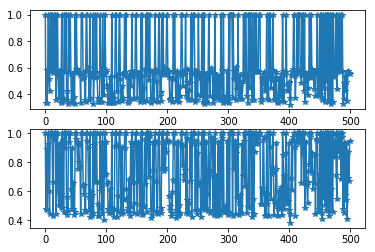

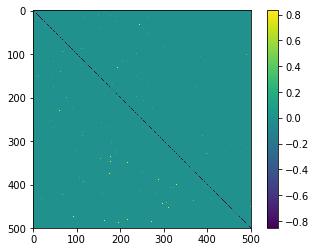

Det:1.2450015222927087e-223
[1.    0.33  0.581 0.332 0.574 1.    0.516 0.426 1.    1.    0.576 1.
 0.572 0.561 1.    0.579 1.    0.577 0.358 1.    1.    0.549 0.372 0.578
 0.577 0.337 0.561 1.    0.343 0.576 0.36  1.    1.    0.568 1.    0.358
 0.428 0.323 1.    0.568 1.    1.    0.55  0.344 0.553 0.336 0.562 0.38
 0.329 1.    0.591 1.    0.587 0.56  0.565 0.567 0.565 0.547 0.331 1.
 1.    1.    0.514 0.531 0.566 0.357 0.338 1.    1.    0.575 0.595 0.56
 0.358 1.    0.37  0.537 0.542 0.534 1.    0.329 0.567 0.519 1.    0.566
 1.    0.532 0.373 0.339 0.361 0.339 1.    0.56  0.565 0.343 1.    0.553
 0.397 0.552 1.    0.57  0.58  0.473 0.441 0.336 0.393 0.336 0.532 0.407
 0.34  1.    0.337 0.399 0.335 0.374 0.54  1.    1.    0.545 0.421 0.549
 0.339 1.    1.    0.514 0.358 0.346 0.459 0.368 0.559 0.536 1.    0.572
 1.    0.554 0.53  0.331 0.348 0.546 0.348 0.374 0.575 0.459 1.    0.541
 0.57  0.368 0.362 0.568 1.    1.    0.563 0.373 0.561 0.561 0.561 0.343
 0.543 1.    0.359 1.    0.36  

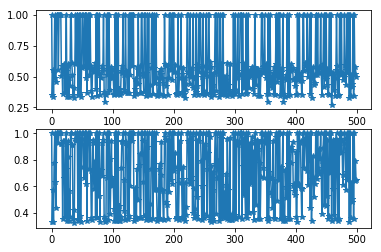

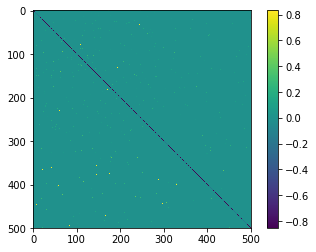

Det:4.1907152744235916e-185
[1.    0.347 0.553 0.338 0.549 1.    0.485 0.453 1.    1.    1.    0.549
 1.    1.    1.    1.    0.503 0.585 0.356 0.56  0.6   0.574 0.369 0.543
 1.    0.337 0.603 0.584 0.334 0.488 0.421 1.    1.    0.609 0.515 0.351
 0.407 0.327 0.601 1.    0.606 1.    1.    0.352 1.    0.352 1.    0.37
 0.333 0.568 1.    1.    0.588 0.574 1.    1.    0.492 1.    0.363 1.
 0.571 1.    0.517 1.    0.584 0.379 0.333 0.557 0.549 0.539 0.553 0.61
 0.396 1.    0.344 1.    0.517 0.521 1.    0.354 0.515 0.491 0.542 0.583
 0.563 1.    0.373 0.29  0.363 0.351 1.    0.514 1.    0.375 1.    0.555
 0.392 0.515 0.575 0.488 0.552 0.491 0.359 0.352 1.    0.362 1.    0.417
 0.36  1.    0.361 0.396 0.35  0.366 0.547 0.586 0.533 1.    0.395 0.516
 0.375 1.    0.547 0.533 0.364 0.366 1.    0.37  1.    0.512 1.    1.
 0.583 1.    1.    0.344 0.4   0.481 0.359 0.364 0.576 0.444 1.    0.519
 0.585 0.365 0.367 1.    1.    0.531 0.507 0.379 1.    1.    0.53  0.342
 0.603 1.    0.356 1.    0.353 

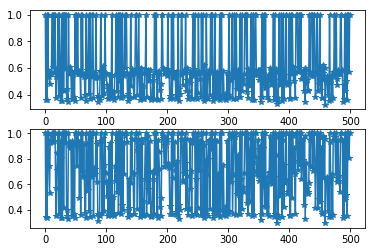

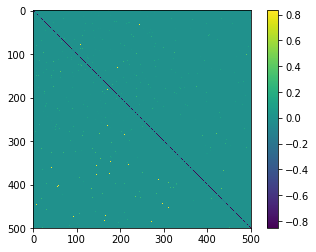

Det:8.615844801416071e-170
[1.    0.361 1.    0.355 1.    0.587 0.532 0.479 0.556 0.567 0.563 1.
 1.    0.608 1.    0.565 1.    0.535 0.371 0.555 0.589 1.    0.388 1.
 0.576 0.353 0.59  1.    0.352 1.    0.424 1.    1.    0.593 1.    0.364
 0.439 0.344 1.    0.553 0.61  0.574 0.575 0.369 0.566 0.368 0.548 0.385
 0.351 1.    0.567 1.    0.577 1.    0.552 0.579 0.555 0.558 0.376 1.
 0.558 1.    0.549 0.531 0.556 0.395 0.352 1.    0.584 0.534 0.558 1.
 0.408 1.    0.366 0.56  0.533 1.    1.    0.371 0.562 0.524 0.539 1.
 0.528 0.541 0.387 0.342 0.379 0.362 0.575 1.    0.571 0.387 0.617 0.524
 0.415 0.557 1.    0.566 0.556 0.475 0.441 0.37  0.423 0.376 0.55  0.433
 0.377 1.    0.378 0.418 0.361 0.383 0.55  0.547 1.    0.554 0.426 1.
 0.384 1.    0.505 1.    0.375 0.383 1.    0.387 0.567 0.541 1.    0.602
 1.    1.    0.562 0.355 0.405 0.552 0.377 0.381 1.    0.462 0.594 0.553
 0.565 0.384 0.38  0.583 1.    1.    0.57  0.398 0.587 1.    0.555 0.359
 0.591 0.599 0.371 0.561 0.368 0.466 0.37 

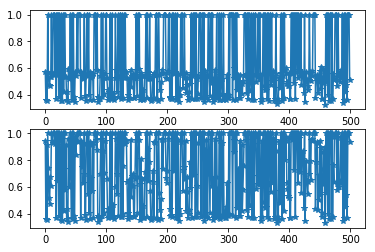

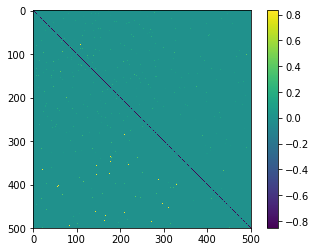

Det:2.0937166372481915e-171
[0.573 0.359 0.572 0.354 1.    0.561 0.476 0.469 0.53  0.534 1.    0.564
 0.559 1.    1.    1.    0.55  1.    0.367 1.    0.551 1.    0.381 1.
 0.55  0.355 1.    0.555 0.352 1.    0.419 1.    1.    0.53  0.537 0.36
 0.42  0.342 0.594 0.516 0.571 1.    0.54  0.364 1.    0.362 1.    0.382
 0.348 0.572 0.542 0.569 1.    0.577 1.    1.    1.    1.    0.373 0.573
 0.556 0.54  0.522 0.532 1.    0.392 0.351 0.546 1.    1.    0.542 1.
 0.399 0.571 0.364 0.525 0.541 0.558 0.556 0.363 1.    1.    1.    0.584
 0.586 1.    0.381 0.342 0.372 0.365 0.544 0.576 1.    0.385 1.    0.567
 0.403 0.528 0.557 1.    1.    0.522 0.439 0.364 0.421 0.372 1.    0.421
 0.369 1.    0.371 0.407 0.364 0.379 0.526 1.    0.584 0.523 0.423 1.
 0.381 0.536 1.    1.    0.37  0.377 1.    0.379 0.557 1.    0.529 1.
 0.574 0.567 0.523 0.358 0.399 0.519 0.373 0.376 0.584 0.46  0.538 0.534
 0.556 0.374 0.375 0.519 0.583 1.    0.545 0.392 1.    0.591 1.    0.361
 0.529 0.566 0.369 0.541 0.364 0.434

In [15]:
a=np.random.rand(len(vertices))
from matplotlib import cm
for i in range(5):
    a,M,s,val,vec=solve_1step(1,0.85,0.98,a,vertices,20)
    plt.subplot(2,1,1)
    plt.plot(a,'-*')
    plt.subplot(2,1,2)
    plt.plot(s,'-*')
    plt.show()
    plt.imshow(M)
    plt.colorbar()
    plt.show()
    
    
    print("Det:"+str(np.linalg.det(M)))
    print(np.around(a,3))
    print(np.around(s,3))
    print(np.around(val,3))
    print(np.around(vec,3))
    

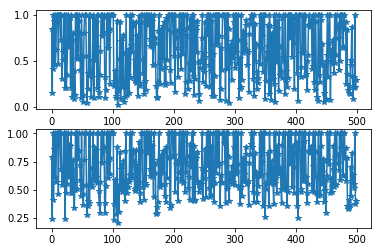

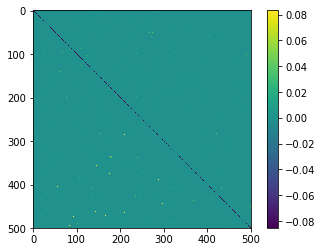

Det:0.0
[0.85  0.149 1.    0.414 0.934 1.    0.452 0.614 1.    1.    1.    0.471
 1.    1.    1.    0.728 1.    0.305 0.505 0.6   1.    1.    0.203 1.
 0.203 0.347 0.671 1.    0.648 0.949 0.964 0.206 1.    0.728 0.111 0.807
 0.082 0.392 0.13  1.    1.    0.521 1.    0.532 1.    0.933 0.805 0.399
 0.101 1.    0.553 0.13  0.05  0.806 1.    1.    1.    0.548 0.039 0.365
 0.189 1.    0.338 1.    0.363 0.105 0.325 0.513 1.    0.095 0.954 0.51
 0.654 0.92  0.21  1.    1.    0.106 0.159 0.342 0.607 1.    1.    0.766
 0.815 1.    0.979 0.324 0.102 0.184 1.    1.    0.639 0.803 1.    0.244
 0.845 1.    1.    1.    1.    1.    0.222 0.284 0.392 0.095 0.115 0.937
 0.024 0.172 0.194 0.522 0.924 0.085 0.717 0.748 0.217 0.785 0.579 0.055
 0.111 0.22  1.    0.555 0.129 0.343 0.628 0.15  1.    0.31  0.667 1.
 0.596 0.879 0.924 0.32  0.506 0.283 0.925 0.26  0.77  0.118 0.35  0.983
 0.229 0.255 0.922 1.    1.    0.367 0.523 0.139 1.    0.278 1.    0.179
 1.    1.    0.895 1.    0.955 0.662 0.741 1.    0

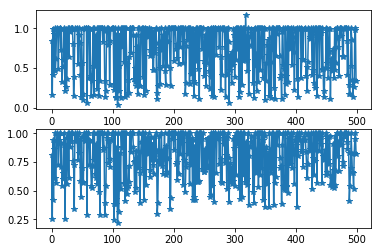

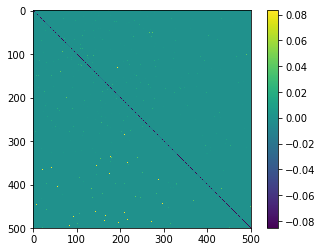

Det:0.0
[0.846 0.16  0.994 0.415 0.927 1.    0.467 0.609 0.994 1.    0.998 0.496
 0.994 1.    1.    0.726 0.992 0.327 0.52  0.601 1.    0.99  0.209 0.996
 0.257 0.366 1.    0.991 0.644 1.    0.956 1.    0.993 1.    1.    0.803
 0.143 0.387 1.    0.993 0.998 1.    0.994 0.554 1.    0.923 0.819 0.416
 0.135 0.997 0.568 0.173 0.1   1.    0.993 0.994 1.    1.    0.064 1.
 1.    0.994 0.376 0.992 0.398 0.146 0.336 0.533 1.    0.159 1.    0.523
 0.648 0.919 0.244 1.    1.    0.143 1.    0.336 1.    1.    1.    1.
 0.823 1.    0.968 0.341 0.132 0.217 1.    0.996 1.    0.797 0.993 0.282
 0.839 0.992 0.994 1.    1.    1.    0.226 0.296 1.    0.126 0.143 0.93
 0.04  1.    0.206 0.527 0.913 0.121 1.    0.761 1.    1.    0.576 1.
 0.136 1.    1.    0.552 0.158 0.354 0.638 0.189 1.    1.    0.685 1.
 1.    1.    0.92  0.367 0.503 0.329 0.916 0.282 0.769 0.175 1.    1.
 0.27  0.27  0.914 0.992 1.    0.393 1.    0.167 0.993 1.    0.995 0.216
 0.993 0.994 0.887 1.    0.952 0.656 0.734 0.995 0.666 0.92

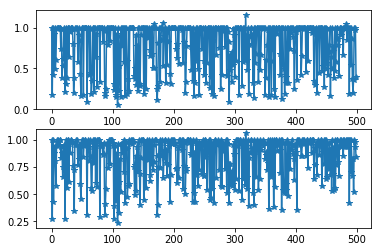

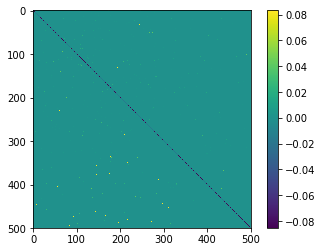

Det:0.0
[1.    0.172 1.    0.417 0.922 0.995 0.5   0.606 0.989 1.    0.996 1.
 0.991 1.    1.    0.737 0.987 0.38  0.533 0.615 0.995 0.986 0.215 1.
 0.315 0.384 1.    1.    0.64  0.995 0.949 1.    1.    0.998 0.998 0.799
 0.199 0.383 0.998 0.989 1.    1.    0.99  0.574 0.996 0.914 0.832 0.432
 0.167 0.995 1.    1.    0.172 0.995 1.    1.    0.996 0.997 0.087 0.996
 1.    0.988 0.418 1.    0.439 0.184 0.346 1.    0.998 0.217 1.    1.
 0.642 0.923 0.274 1.    1.    1.    1.    0.331 0.995 0.997 0.994 0.994
 0.829 0.997 0.959 0.206 0.161 0.247 0.996 0.994 0.996 0.792 1.    1.
 0.833 1.    1.    1.    0.995 0.995 0.232 0.307 0.994 0.155 0.181 0.924
 0.056 0.995 0.218 0.536 0.902 0.155 0.996 0.773 0.996 0.996 0.584 1.
 0.16  0.998 0.998 0.587 0.186 0.371 1.    0.225 0.998 0.998 1.    1.
 0.995 0.998 1.    0.409 0.501 0.372 0.908 0.302 0.781 0.227 0.996 1.
 0.311 0.283 0.906 1.    1.    1.    1.    0.192 0.991 0.998 0.991 0.25
 1.    0.99  0.88  1.    0.948 0.65  0.727 0.991 0.678 1.    0.50

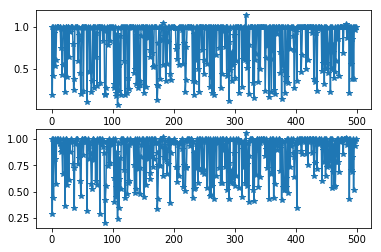

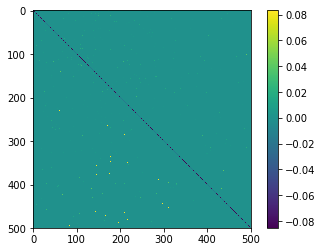

Det:0.0
[1.    0.183 1.    0.42  0.925 1.    0.529 0.604 1.    0.997 1.    0.998
 0.989 1.    0.995 0.751 0.982 0.429 0.546 1.    0.992 0.983 0.229 1.
 1.    0.401 0.998 0.996 0.637 0.991 0.942 1.    0.998 0.996 0.996 0.795
 0.249 0.379 0.996 0.986 1.    1.    1.    0.592 0.991 0.905 0.843 0.447
 0.195 1.    1.    0.998 0.237 1.    1.    1.    0.993 0.995 0.11  0.992
 1.    0.983 0.457 0.996 0.477 0.219 0.356 1.    1.    0.272 0.998 0.996
 0.637 0.928 0.301 1.    0.998 0.998 1.    0.327 1.    0.995 1.    0.99
 0.835 0.994 0.949 0.205 0.187 0.275 0.995 0.992 0.992 0.787 1.    0.997
 0.827 0.994 0.998 0.995 0.992 1.    0.27  0.318 1.    0.182 0.216 0.917
 0.072 0.991 0.231 0.545 0.892 0.186 1.    1.    0.991 1.    0.591 0.998
 0.182 0.996 0.996 1.    0.211 0.388 0.995 0.258 0.996 1.    0.998 0.998
 0.991 0.996 0.996 0.448 0.499 1.    0.901 0.32  1.    0.274 0.992 1.
 0.351 0.302 0.898 0.994 1.    0.998 1.    0.216 0.989 0.996 1.    0.282
 1.    0.989 0.872 1.    0.944 0.645 0.72  1.    0

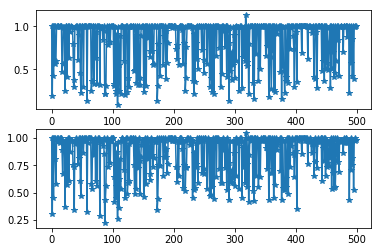

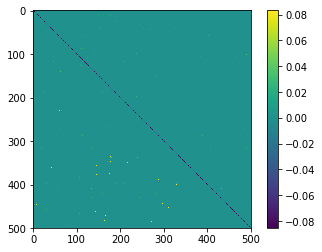

Det:0.0
[1.    0.195 1.    0.423 1.    1.    0.556 0.601 1.    0.994 0.998 1.
 0.988 1.    0.991 1.    1.    0.472 0.558 0.995 0.99  0.98  0.243 0.998
 0.998 0.416 0.996 1.    0.633 1.    0.935 0.998 0.996 0.994 0.994 0.791
 0.295 0.376 0.994 0.982 1.    0.996 0.998 0.608 1.    0.896 1.    0.462
 0.222 1.    1.    0.996 0.297 1.    0.998 1.    0.992 1.    0.131 0.989
 1.    1.    1.    1.    1.    0.252 0.366 0.997 0.998 0.327 0.996 1.
 0.633 0.931 0.326 0.998 1.    0.996 1.    0.323 0.996 0.993 0.996 0.987
 0.841 1.    0.94  0.208 0.213 0.3   0.993 1.    0.99  0.782 0.998 0.995
 0.821 1.    0.995 1.    1.    1.    0.306 0.329 0.995 0.207 0.249 0.912
 0.088 0.987 0.243 0.553 0.883 0.215 0.998 1.    1.    0.997 0.597 0.996
 0.204 0.994 1.    1.    0.234 0.403 0.989 0.289 0.993 1.    1.    0.996
 0.987 1.    1.    0.482 0.497 1.    0.894 0.338 0.997 0.318 0.988 1.
 0.394 0.32  0.891 0.989 0.998 0.996 0.998 0.239 0.988 1.    0.998 0.311
 1.    0.987 0.865 0.997 0.94  0.641 0.714 1.    0.7

In [16]:
a=np.random.rand(len(vertices))
from matplotlib import cm
for i in range(5):
    a,M,s,val,vec=solve_1step(0.1,0.85,0.98,a,vertices,1)
    plt.subplot(2,1,1)
    plt.plot(a,'-*')
    plt.subplot(2,1,2)
    plt.plot(s,'-*')
    plt.show()
    plt.imshow(M)
    plt.colorbar()
    plt.show()
    
    
    print("Det:"+str(np.linalg.det(M)))
    print(np.around(a,3))
    print(np.around(s,3))
    print(np.around(val,3))
    print(np.around(vec,3))
    

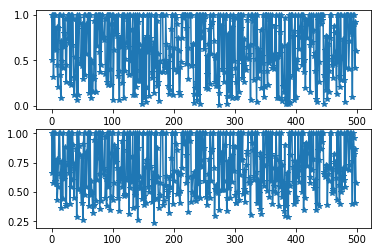

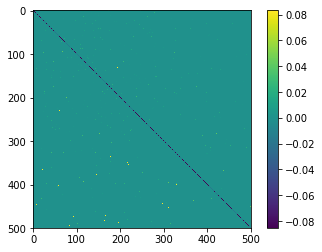

Det:0.0
[1.    0.504 1.    0.314 1.    1.    0.623 0.611 0.864 0.453 0.208 0.854
 1.    1.    0.338 0.079 0.707 0.495 0.412 1.    0.645 0.798 0.953 0.444
 0.261 0.736 1.    1.    0.685 1.    0.247 1.    0.226 0.666 1.    0.959
 0.304 0.114 0.314 0.541 0.953 0.063 1.    0.115 1.    0.961 0.906 0.473
 0.522 0.431 0.899 0.29  0.848 1.    1.    0.333 0.897 0.568 0.858 1.
 1.    0.135 1.    1.    0.079 0.507 0.474 0.155 0.332 0.291 0.932 1.
 0.149 1.    0.657 0.866 1.    1.    0.595 0.366 1.    0.445 1.    1.
 0.751 0.719 0.761 0.953 0.345 0.372 0.262 1.    1.    0.23  1.    1.
 0.406 0.229 0.894 1.    1.    0.058 0.611 0.966 0.915 0.792 0.986 0.763
 0.325 1.    0.384 0.062 0.746 0.644 0.66  0.994 0.25  1.    0.084 1.
 0.378 0.514 0.686 1.    0.951 0.642 1.    0.337 1.    0.494 0.576 0.343
 0.836 1.    0.121 0.843 0.117 1.    0.21  0.391 1.    0.273 0.919 1.
 0.671 0.277 0.616 0.567 0.023 1.    1.    0.083 0.174 0.749 0.208 0.034
 0.767 1.    0.586 1.    0.104 0.748 0.613 1.    0.31  0.368 

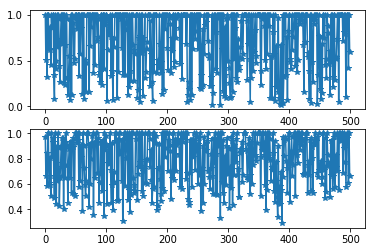

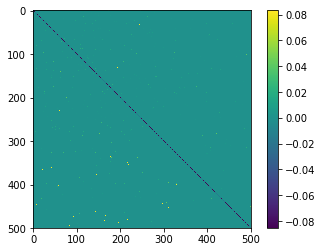

Det:0.0
[1.    0.506 0.998 0.317 1.    1.    0.623 0.611 0.863 0.453 1.    0.853
 1.    0.999 0.341 0.084 1.    0.498 0.412 0.999 0.645 1.    0.953 0.444
 0.265 0.736 0.999 1.    0.685 1.    0.249 0.999 0.23  0.669 1.    0.959
 0.309 0.117 0.318 0.544 0.954 0.069 0.999 0.12  0.999 0.96  0.907 0.474
 0.522 1.    1.    1.    0.849 0.999 1.    0.335 1.    0.568 0.858 0.999
 0.999 0.138 1.    0.999 0.084 0.508 0.474 0.16  1.    1.    1.    0.999
 0.151 0.999 0.657 0.866 0.999 1.    1.    0.366 0.999 0.447 0.999 1.
 1.    0.719 0.76  0.953 0.346 0.374 0.267 0.999 0.999 0.233 0.999 0.999
 0.405 1.    0.894 1.    0.999 0.062 0.612 0.965 0.914 0.791 1.    0.762
 0.326 0.999 0.386 0.066 0.745 0.644 1.    0.993 1.    0.999 0.088 1.
 0.378 1.    1.    0.998 0.95  0.642 0.999 0.337 0.999 1.    1.    0.346
 0.835 1.    1.    0.843 0.12  1.    0.213 0.391 1.    0.276 1.    1.
 0.67  0.279 0.615 0.566 1.    0.999 1.    0.086 0.179 0.749 1.    0.042
 0.767 1.    0.585 1.    0.108 0.748 0.613 1.    0.3

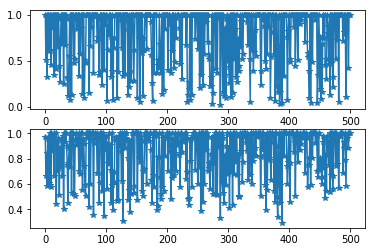

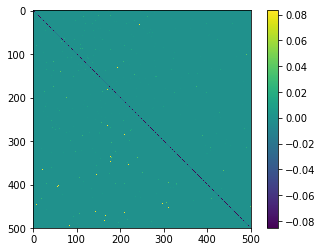

Det:0.0
[0.999 0.507 0.997 0.319 1.    1.    0.622 0.611 1.    0.455 1.    0.853
 0.999 0.999 0.345 1.    0.999 1.    0.412 0.998 0.645 1.    0.952 0.445
 0.271 0.736 0.999 0.999 0.685 0.999 0.25  1.    1.    0.671 1.    0.958
 0.313 0.121 0.323 0.548 1.    0.076 1.    0.124 1.    0.96  1.    0.474
 0.522 0.999 1.    0.999 0.85  0.999 0.999 0.339 1.    0.569 0.857 1.
 1.    0.142 0.999 0.998 0.09  0.509 0.474 1.    1.    1.    1.    1.
 0.154 1.    0.656 0.867 1.    1.    1.    0.366 0.999 1.    0.999 1.
 1.    0.719 0.76  0.953 0.347 0.376 1.    1.    0.999 0.237 0.999 1.
 0.405 0.999 0.893 1.    0.998 0.067 0.614 0.964 1.    0.791 0.999 0.762
 0.327 1.    0.388 0.069 0.745 0.643 1.    0.993 1.    0.999 0.091 0.999
 0.379 1.    0.999 1.    0.949 0.642 1.    0.336 0.999 1.    1.    0.351
 1.    1.    0.999 0.843 0.124 0.999 0.217 0.39  0.999 0.279 1.    1.
 1.    0.281 0.615 1.    1.    1.    1.    0.09  1.    0.749 1.    0.049
 1.    1.    0.585 0.999 0.112 0.747 0.614 1.    1.    1. 

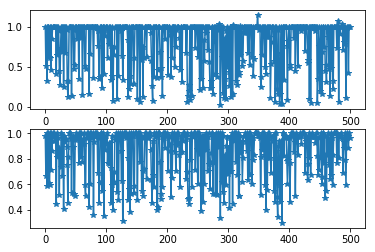

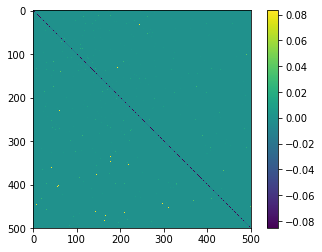

Det:0.0
[0.999 0.509 1.    0.322 1.    0.999 0.622 0.61  1.    0.457 1.    0.853
 1.    0.999 1.    0.999 0.999 1.    0.412 1.    0.647 0.999 0.951 0.445
 0.277 0.735 1.    0.999 0.685 0.999 0.252 1.    1.    0.674 1.    0.957
 0.318 0.124 0.327 1.    1.    1.    1.    0.128 1.    0.959 1.    0.475
 0.522 0.999 1.    1.    0.851 0.999 0.999 0.343 1.    1.    0.857 1.
 0.999 0.148 0.999 0.997 1.    0.51  0.475 1.    1.    0.999 1.    1.
 0.156 1.    0.656 1.    1.    1.    1.    0.366 0.998 1.    1.    1.
 1.002 1.    0.759 0.953 0.348 0.378 1.    1.    1.    0.24  1.    1.
 0.404 0.998 0.893 0.999 0.998 1.    0.615 0.964 0.999 0.79  0.998 0.761
 0.329 1.    0.39  0.072 0.744 0.643 0.999 0.992 1.    0.999 0.096 1.
 0.38  1.    1.    1.    0.948 0.641 1.    0.336 0.999 1.    0.999 1.
 0.999 1.    0.999 0.842 0.127 1.    0.22  0.39  1.    0.282 1.    1.
 1.    0.283 0.615 1.    1.    1.    1.    0.093 1.    1.    0.999 0.057
 1.    1.    0.584 0.999 0.116 0.747 0.614 1.    0.999 1.    0.6

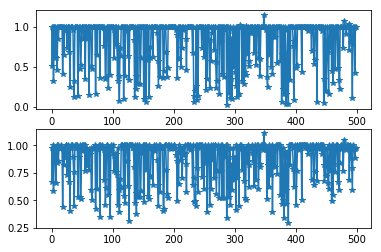

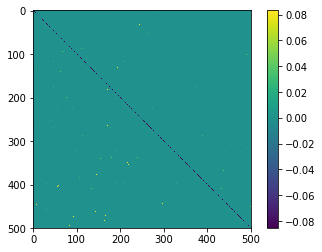

Det:0.0
[0.999 0.51  1.    0.325 1.    0.999 0.625 0.611 1.    0.461 1.    0.854
 1.    0.999 1.    0.999 1.    1.    0.413 1.    0.649 0.999 0.951 1.
 1.    0.735 1.    0.999 0.685 0.998 0.253 1.    0.999 1.    1.    0.957
 0.322 0.127 1.    1.    1.    1.    1.    0.132 0.999 0.958 1.    0.475
 0.522 0.998 1.    1.    0.852 1.    1.    0.347 1.    1.    0.856 0.999
 0.999 0.154 0.999 0.997 1.    0.511 0.475 0.999 1.    0.999 1.    1.
 0.159 1.    0.655 1.    0.999 1.    1.    0.366 1.    0.999 1.    1.
 1.002 1.    0.758 0.953 0.349 0.38  1.    1.    1.    0.243 1.    1.
 0.404 0.998 1.    0.999 1.    0.999 0.617 0.963 0.998 0.79  0.998 0.761
 0.33  1.    0.392 0.075 0.743 0.643 1.    1.    1.    0.998 0.1   1.
 0.381 1.    1.    1.    0.947 0.641 1.    0.335 1.    1.    1.    1.
 1.    1.    0.999 0.842 0.13  1.    0.224 0.39  1.    0.284 0.999 1.
 0.999 0.285 0.614 0.999 1.    1.    1.    0.096 1.    1.    1.    0.064
 1.    0.999 0.584 1.    0.12  0.746 0.614 1.    0.999 1.    0.6

In [17]:
a=np.random.rand(len(vertices))
from matplotlib import cm
for i in range(5):
    a,M,s,val,vec=solve_1step(0.1,0.85,0.98,a,vertices,0.1)
    plt.subplot(2,1,1)
    plt.plot(a,'-*')
    plt.subplot(2,1,2)
    plt.plot(s,'-*')
    plt.show()
    plt.imshow(M)
    plt.colorbar()
    plt.show()
    
    
    print("Det:"+str(np.linalg.det(M)))
    print(np.around(a,3))
    print(np.around(s,3))
    print(np.around(val,3))
    print(np.around(vec,3))
    

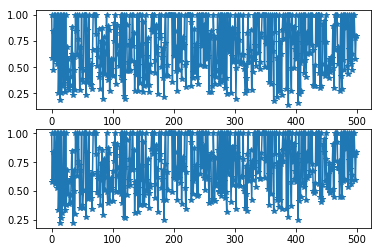

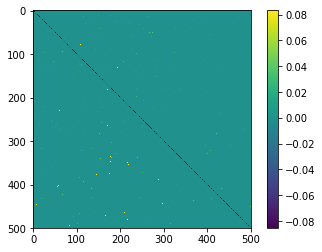

Det:0.0
[1.    0.591 0.845 0.478 1.    1.    0.57  0.813 1.    0.53  1.    0.255
 0.514 1.    0.189 1.    0.257 0.324 0.633 1.    0.348 1.    0.267 1.
 0.388 0.692 0.305 0.577 0.462 0.282 0.326 0.409 0.597 0.885 0.628 0.229
 0.595 0.475 0.283 1.    0.846 1.    0.625 0.769 1.    0.603 0.278 0.691
 0.492 1.    0.391 0.354 0.47  1.    1.    1.    0.236 1.    0.854 0.574
 0.355 1.    0.437 0.341 0.328 0.531 0.287 0.661 1.    1.    1.    1.
 0.815 1.    0.513 0.669 0.602 0.869 0.405 0.444 0.293 0.754 0.52  0.874
 0.197 0.787 0.73  0.43  0.629 0.657 1.    0.421 0.379 0.893 0.853 0.274
 0.463 0.574 0.478 0.429 0.577 0.42  0.927 0.752 1.    0.342 0.824 0.905
 0.7   0.627 0.515 0.633 0.88  0.417 1.    0.379 1.    0.38  0.229 1.
 0.193 0.726 1.    0.908 0.466 0.549 0.459 0.707 1.    0.468 0.76  0.562
 1.    1.    0.704 0.823 0.276 0.543 0.429 0.511 1.    0.519 0.271 1.
 1.    0.35  0.724 0.603 1.    0.265 0.931 0.398 0.319 0.416 1.    0.727
 0.326 0.606 0.779 0.333 0.264 0.531 0.451 0.862 1.    

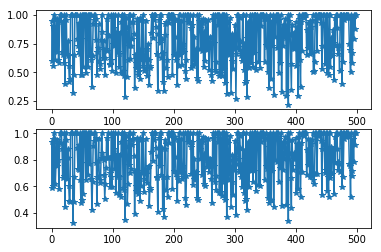

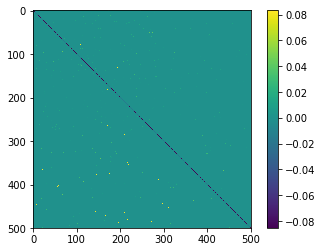

Det:0.0
[0.95  0.601 0.904 0.556 1.    0.963 0.609 0.771 0.961 0.68  0.934 0.609
 0.579 0.944 1.    1.    1.    0.679 0.653 0.939 0.584 1.    0.394 0.957
 1.    0.657 0.644 0.769 0.553 0.416 0.439 1.    1.    1.    1.    0.316
 0.647 0.473 1.    1.    1.    1.    0.789 0.733 0.931 0.675 1.    0.655
 0.477 1.    0.479 1.    0.55  1.    0.925 1.    0.492 1.    0.792 1.
 0.546 1.    0.641 1.    1.    0.603 0.373 0.64  0.924 0.952 1.    1.
 0.779 0.967 0.479 0.677 0.714 0.918 0.594 0.573 0.532 0.777 1.    0.849
 0.624 0.77  0.694 0.473 0.625 0.7   0.966 0.682 1.    0.827 0.819 0.568
 0.56  0.605 1.    0.513 0.745 1.    0.887 0.73  1.    0.492 0.795 0.851
 0.675 1.    0.547 0.658 0.838 0.493 0.94  1.    1.    0.511 0.468 1.
 0.284 0.854 0.972 0.889 0.458 0.604 1.    0.728 1.    0.62  0.733 0.786
 0.941 0.936 1.    0.83  0.36  0.654 0.536 0.585 0.964 0.503 0.475 0.953
 0.97  0.445 0.703 0.61  0.957 0.553 1.    0.514 0.536 0.605 0.948 0.7
 0.466 0.704 0.749 0.607 0.393 0.553 0.535 0.843 1.   

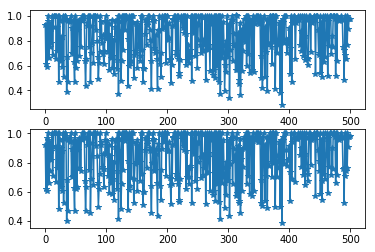

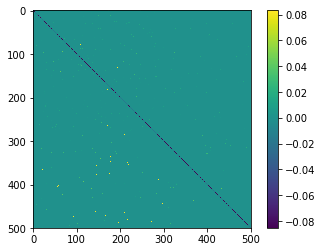

Det:0.0
[0.926 0.616 0.934 0.587 0.963 1.    0.657 0.747 0.937 0.781 0.892 1.
 0.688 0.912 1.    1.    1.    1.    0.657 0.914 0.716 1.    0.464 1.
 0.963 0.636 0.807 0.84  0.588 1.    0.506 0.968 1.    1.    0.975 0.387
 0.67  0.467 0.961 0.971 0.972 0.95  1.    0.705 0.899 0.691 0.959 0.632
 0.471 1.    0.582 0.957 0.639 0.96  0.889 0.966 0.677 0.965 0.749 0.965
 1.    0.962 1.    1.    0.976 0.641 0.435 0.655 0.941 0.923 1.    1.
 0.753 1.    0.472 0.705 0.786 0.923 1.    0.617 1.    1.    1.    0.888
 1.    0.795 0.666 0.49  0.624 0.707 1.    0.829 0.955 0.78  0.848 0.697
 0.614 0.714 0.961 1.    0.817 0.958 0.854 0.71  0.933 0.564 0.827 0.811
 0.658 0.965 0.583 0.676 0.803 0.532 0.909 0.96  0.963 0.643 0.574 1.
 0.367 1.    0.953 0.871 0.473 0.637 1.    0.726 1.    1.    1.    0.885
 1.    1.    0.972 0.812 0.434 1.    0.593 0.625 1.    0.639 1.    1.
 0.946 0.502 0.687 0.714 0.935 0.7   0.952 0.579 0.774 0.748 0.92  0.679
 0.637 1.    0.725 1.    0.471 0.579 0.572 0.857 0.969 0.9

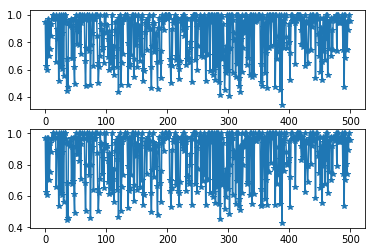

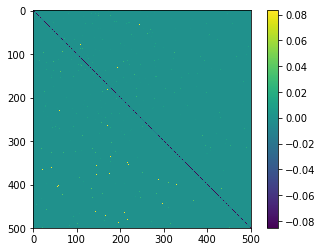

Det:0.0
[0.946 0.625 0.951 0.599 0.942 0.971 0.699 0.753 0.934 0.848 0.932 0.97
 1.    1.    0.978 0.976 0.972 1.    0.653 0.893 0.824 0.979 0.519 1.
 0.943 0.622 1.    0.867 0.601 1.    0.553 0.943 1.    1.    0.96  0.44
 0.68  0.47  0.939 0.946 0.944 0.92  0.973 0.682 0.911 0.686 0.96  0.617
 0.492 0.979 1.    0.928 0.79  0.961 0.872 1.    0.781 1.    0.716 0.937
 0.963 1.    0.972 0.97  1.    0.661 0.477 0.756 1.    1.    0.964 1.
 0.733 0.977 0.488 0.776 0.869 1.    0.969 0.628 0.969 0.972 1.    1.
 1.    0.848 0.645 0.505 0.622 0.701 1.    0.894 0.931 0.745 0.876 0.765
 0.648 1.    0.937 1.    0.869 0.926 0.827 0.693 0.883 0.599 0.844 0.779
 0.645 1.    0.61  0.697 0.773 0.557 0.891 0.946 0.944 0.76  0.62  0.978
 0.434 0.979 0.953 1.    0.49  0.651 0.951 0.716 0.972 0.973 1.    1.
 0.978 0.974 1.    0.794 0.49  0.971 0.619 0.643 0.977 0.709 1.    0.977
 1.    0.548 0.674 1.    0.923 0.779 0.923 0.617 1.    0.85  0.919 0.662
 0.821 0.975 0.704 1.    0.518 0.604 0.592 0.877 0.943 0.

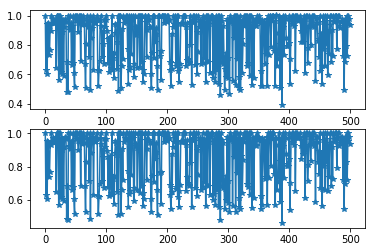

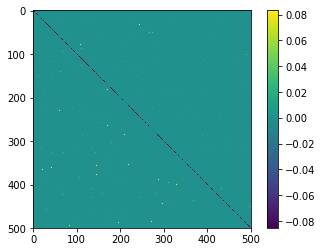

Det:0.0
[1.    0.628 0.946 0.603 0.924 0.948 0.732 0.766 0.93  0.896 1.    0.95
 0.975 0.975 0.959 0.956 0.949 0.977 0.646 1.    1.    1.    0.558 1.
 1.    0.617 0.976 0.887 0.604 0.971 0.588 0.923 0.973 0.979 0.955 0.479
 0.685 0.482 1.    0.925 1.    0.902 0.949 0.663 0.932 0.675 1.    0.606
 0.511 1.    0.969 1.    1.    0.949 0.887 0.974 1.    1.    0.69  1.
 0.937 0.966 1.    0.945 0.978 0.673 0.506 0.808 1.    0.968 0.925 0.974
 0.717 1.    0.496 0.847 0.917 0.973 1.    0.627 0.951 0.949 0.974 0.976
 0.972 1.    0.631 0.518 0.62  0.691 0.975 1.    0.929 0.719 0.895 0.808
 0.673 0.969 0.922 0.971 1.    0.899 0.839 0.677 0.849 0.616 0.855 0.754
 0.641 1.    0.627 0.714 0.747 0.575 0.883 0.946 0.934 0.818 0.639 1.
 0.484 1.    1.    1.    0.506 0.657 0.909 0.705 1.    0.95  0.974 0.975
 0.958 1.    1.    0.774 0.532 1.    0.631 0.65  1.    0.739 0.971 1.
 0.976 0.579 0.671 1.    0.926 0.869 0.915 0.64  1.    1.    0.918 0.647
 1.    1.    0.687 1.    0.548 0.628 0.602 1.    1.    0

In [18]:
a=np.random.rand(len(vertices))
from matplotlib import cm
for i in range(5):
    a,M,s,val,vec=solve_1step(0.1,0.85,0.98,a,vertices,10)
    plt.subplot(2,1,1)
    plt.plot(a,'-*')
    plt.subplot(2,1,2)
    plt.plot(s,'-*')
    plt.show()
    plt.imshow(M)
    plt.colorbar()
    plt.show()
    
    
    print("Det:"+str(np.linalg.det(M)))
    print(np.around(a,3))
    print(np.around(s,3))
    print(np.around(val,3))
    print(np.around(vec,3))
    

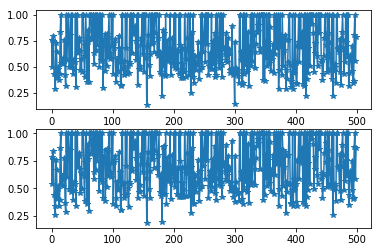

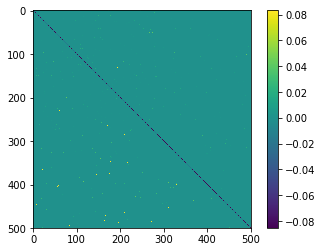

Det:0.0
[0.754 0.496 0.794 0.748 0.426 0.433 0.288 0.729 0.645 0.392 0.478 0.496
 0.367 0.433 0.83  1.    0.534 0.537 0.526 0.579 0.566 0.755 0.422 0.308
 1.    0.561 0.782 1.    0.747 0.501 0.808 1.    0.498 1.    0.557 0.428
 0.471 0.574 0.547 1.    0.299 1.    1.    0.629 0.745 0.774 0.648 0.466
 0.573 0.45  1.    1.    1.    0.599 0.397 0.707 1.    0.697 0.356 0.739
 0.852 0.348 1.    1.    1.    0.771 0.786 1.    1.    0.631 0.529 1.
 0.656 1.    0.711 1.    0.793 1.    0.492 0.763 1.    0.569 0.555 1.
 0.295 0.77  0.724 0.813 0.457 0.719 0.506 0.817 0.594 0.787 1.    0.574
 0.636 0.579 1.    0.702 1.    0.427 0.681 0.728 0.762 0.424 0.355 0.572
 0.547 0.455 0.791 0.595 0.672 0.32  0.312 1.    1.    0.49  0.416 0.55
 0.455 1.    0.678 1.    0.424 0.509 0.434 0.541 1.    0.523 1.    0.633
 0.632 1.    1.    0.828 0.815 0.888 0.562 0.752 1.    0.321 1.    0.477
 0.51  0.478 0.775 0.71  1.    0.621 1.    0.444 1.    1.    1.    0.587
 0.132 0.698 0.802 1.    0.514 0.409 0.626 1.    0

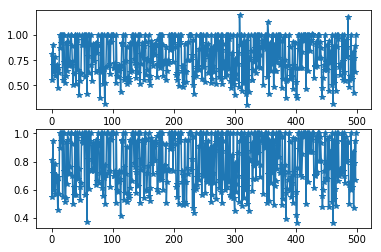

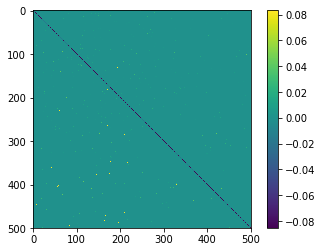

Det:0.0
[0.815 0.557 0.898 0.702 0.63  0.78  0.598 0.695 0.702 0.651 0.479 0.674
 0.619 1.    0.874 0.917 1.    1.    0.558 1.    1.    0.731 0.528 0.594
 0.92  0.64  1.    0.931 0.697 0.701 0.736 1.    1.    0.895 0.703 0.51
 0.612 0.739 1.    1.    0.519 1.    0.945 0.651 1.    0.409 0.618 0.545
 0.622 1.    0.903 0.9   0.947 1.    0.584 1.    0.915 1.    0.412 1.
 0.793 0.623 1.    0.907 1.    0.707 0.542 0.907 0.879 0.746 0.861 0.912
 0.63  0.923 0.817 0.902 1.    0.658 0.651 0.374 0.902 1.    0.636 1.
 0.512 1.    0.664 0.314 0.529 0.686 1.    1.    1.    0.693 0.933 0.708
 0.613 1.    0.928 1.    1.    1.    0.677 0.678 0.718 0.522 1.    0.598
 0.587 0.682 0.706 0.648 0.676 0.44  0.69  0.911 0.916 1.    0.552 0.729
 0.577 1.    0.74  0.881 0.51  0.584 0.532 0.565 0.917 0.633 0.912 0.642
 1.    0.917 1.    0.762 0.727 1.    0.575 0.705 0.918 0.626 1.    1.
 1.    0.517 0.715 0.814 0.924 0.774 0.891 0.55  0.894 1.    0.931 0.604
 0.653 0.764 0.742 1.    0.555 0.502 0.598 0.937 0.73

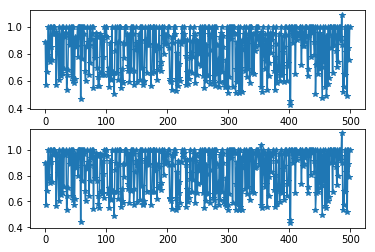

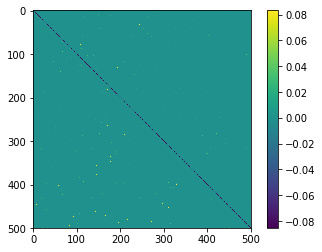

Det:0.0
[0.885 0.574 0.877 0.666 0.795 1.    0.767 0.741 1.    1.    0.848 0.752
 1.    0.945 1.    1.    0.949 0.958 0.573 0.929 0.942 0.816 0.606 1.
 0.887 0.64  0.943 1.    0.663 1.    0.691 0.943 0.939 0.927 1.    0.537
 0.643 0.684 0.956 1.    0.864 0.936 1.    0.632 1.    0.597 1.    0.588
 0.615 0.924 0.861 0.851 0.921 1.    0.778 1.    1.    1.    0.469 1.
 1.    0.759 1.    1.    0.944 0.671 0.598 0.858 0.848 1.    0.885 0.867
 0.645 1.    0.73  0.908 0.943 1.    1.    0.549 0.86  0.913 0.773 0.954
 0.697 0.927 0.628 0.561 0.562 0.659 0.945 0.931 0.927 0.647 0.899 0.78
 0.644 1.    0.932 1.    1.    0.926 0.67  0.647 0.7   0.557 0.877 0.617
 0.61  1.    0.654 0.67  0.662 0.503 0.824 1.    0.879 1.    0.662 0.884
 0.609 1.    1.    1.    0.549 0.604 0.69  0.587 0.878 0.769 1.    1.
 1.    0.873 0.949 0.713 0.675 0.942 0.591 0.671 1.    0.687 1.    0.945
 1.    0.573 0.674 0.831 1.    0.881 0.852 0.596 0.859 0.949 0.897 0.608
 1.    1.    0.698 1.    0.57  0.596 0.6   0.898 1.  

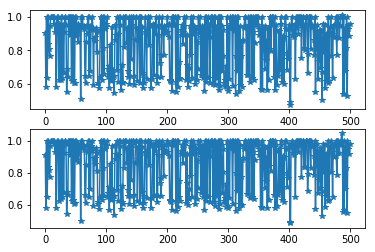

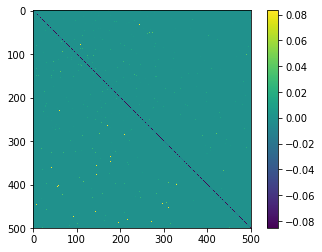

Det:0.0
[0.901 0.58  1.    0.637 0.84  1.    0.808 0.765 0.947 1.    1.    1.
 1.    1.    0.958 1.    0.909 0.949 0.581 1.    0.928 1.    0.622 0.958
 0.903 0.625 1.    1.    0.637 0.949 0.662 0.91  1.    1.    0.95  0.548
 0.687 0.642 1.    1.    0.893 1.    1.    0.618 1.    0.621 1.    0.606
 0.604 1.    0.887 1.    0.918 0.956 0.848 0.945 0.948 0.942 0.512 1.
 0.946 1.    0.941 0.944 0.929 0.647 0.604 0.847 0.897 0.951 1.    1.
 0.647 0.947 0.674 0.933 0.922 1.    0.932 0.593 0.87  0.881 0.855 0.935
 0.789 0.908 0.604 0.607 0.577 0.642 0.92  1.    1.    0.621 1.    0.812
 0.661 1.    0.929 0.946 0.955 1.    0.686 0.638 0.704 0.573 0.834 0.664
 0.619 0.939 0.621 0.683 0.644 0.542 0.864 0.954 0.891 1.    0.68  0.898
 0.612 1.    0.95  1.    0.565 0.612 0.711 0.602 1.    0.819 1.    1.
 1.    0.844 0.931 0.674 0.642 1.    0.599 0.644 1.    0.748 0.953 1.
 1.    0.591 0.646 0.86  1.    1.    0.927 0.619 0.87  0.938 1.    0.607
 1.    1.    0.663 0.936 0.576 0.651 0.605 0.908 1.    0.9

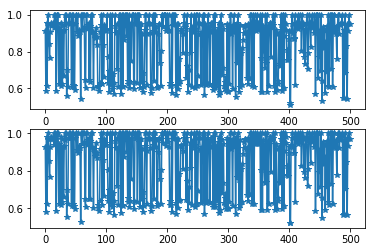

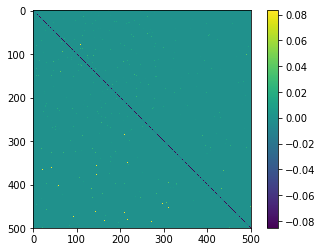

Det:0.0
[0.914 0.583 0.956 0.612 1.    0.951 0.841 0.764 0.908 0.947 0.956 0.946
 0.949 0.955 0.931 1.    1.    0.947 0.585 1.    1.    1.    0.621 0.926
 0.903 0.61  0.957 0.947 0.624 0.913 0.665 0.918 1.    0.947 1.    0.555
 0.698 0.609 0.955 1.    1.    0.951 0.955 0.609 1.    0.617 1.    0.614
 0.592 0.952 1.    1.    0.908 1.    0.887 0.91  0.918 0.904 0.54  1.
 0.92  1.    1.    1.    0.935 0.647 0.599 1.    1.    0.921 0.946 0.955
 0.645 0.941 0.635 1.    0.909 1.    0.905 0.602 0.898 0.876 0.872 0.927
 0.838 0.877 0.606 0.611 0.585 0.629 0.906 0.947 1.    0.623 1.    0.835
 0.662 0.944 0.923 0.91  0.919 1.    0.772 0.628 0.694 0.581 1.    0.682
 0.618 1.    0.598 0.675 0.628 0.568 1.    0.937 0.899 0.948 0.705 0.909
 0.607 1.    0.909 1.    0.571 0.613 1.    0.608 1.    0.861 0.942 1.
 1.    0.885 1.    0.641 0.621 1.    0.6   0.631 0.955 0.749 1.    1.
 1.    0.596 0.632 1.    0.957 0.949 1.    0.626 1.    0.934 1.    0.603
 0.948 0.95  0.634 0.896 0.577 0.68  0.606 0.919 1. 

In [19]:
a=np.random.rand(len(vertices))
from matplotlib import cm
for i in range(5):
    a,M,s,val,vec=solve_1step(0.1,0.85,0.98,a,vertices,20)
    plt.subplot(2,1,1)
    plt.plot(a,'-*')
    plt.subplot(2,1,2)
    plt.plot(s,'-*')
    plt.show()
    plt.imshow(M)
    plt.colorbar()
    plt.show()
    
    
    print("Det:"+str(np.linalg.det(M)))
    print(np.around(a,3))
    print(np.around(s,3))
    print(np.around(val,3))
    print(np.around(vec,3))
    

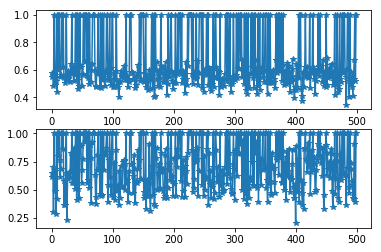

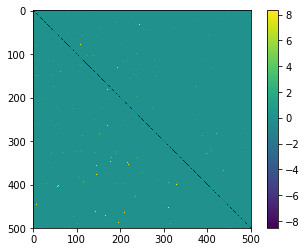

Det:1.9489534739056275e+255
[0.575 0.548 0.561 0.485 1.    0.492 0.538 0.517 1.    0.44  1.    0.597
 1.    0.621 0.547 0.561 1.    1.    0.622 1.    0.54  0.555 0.504 0.533
 1.    0.515 0.592 0.537 0.575 0.554 0.509 0.641 0.591 1.    0.574 0.576
 0.521 0.627 0.563 1.    1.    0.529 1.    0.461 1.    0.483 1.    0.638
 0.618 0.483 0.563 0.569 1.    1.    0.653 1.    1.    1.    0.556 1.
 0.537 0.493 1.    0.633 0.596 0.514 0.642 1.    1.    1.    1.    0.595
 0.47  0.484 0.57  0.586 1.    0.595 0.613 0.473 1.    0.465 1.    0.522
 0.575 1.    0.535 0.481 0.573 0.595 1.    1.    0.528 0.543 0.602 1.
 0.522 0.49  0.615 1.    1.    0.475 0.575 0.473 0.533 0.587 1.    0.489
 0.478 0.512 0.403 0.521 0.509 0.572 0.59  0.549 0.557 0.558 0.627 0.561
 0.525 0.583 1.    0.523 0.553 0.474 0.511 0.522 1.    1.    1.    0.577
 0.586 0.577 0.536 0.531 0.53  0.47  0.551 0.49  0.545 0.635 0.573 0.58
 1.    0.519 0.535 1.    1.    1.    1.    0.518 0.511 0.57  1.    0.476
 0.543 0.557 0.455 0.533 0.599

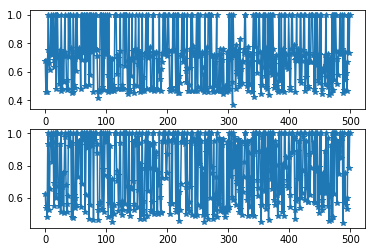

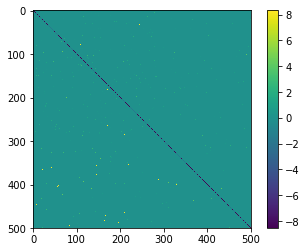

Det:6.0213579853536865e+286
[0.674 0.458 0.68  0.458 0.753 1.    0.659 0.614 0.728 1.    0.741 0.72
 0.749 1.    0.637 0.683 1.    1.    0.478 1.    1.    0.704 0.515 0.711
 0.753 0.463 1.    0.72  0.479 0.737 0.53  0.712 1.    0.742 0.709 0.473
 0.545 0.482 1.    0.707 1.    1.    0.767 0.455 0.749 0.456 1.    0.506
 0.484 0.689 1.    0.61  1.    0.721 0.704 0.747 0.765 0.724 0.479 1.
 0.687 1.    0.735 1.    1.    0.502 0.504 1.    0.682 1.    0.729 1.
 0.511 1.    0.577 1.    0.741 0.775 1.    0.46  0.768 1.    0.762 1.
 0.755 0.709 0.469 0.42  0.459 0.467 1.    1.    1.    0.497 0.712 1.
 0.476 0.728 1.    0.753 0.735 1.    0.577 0.459 1.    0.469 0.699 0.548
 0.466 0.689 0.48  0.507 0.465 0.485 1.    1.    1.    0.722 0.582 0.701
 0.483 0.647 0.75  1.    0.481 0.487 0.51  0.481 1.    1.    1.    0.639
 1.    1.    0.676 0.445 0.474 1.    0.479 0.468 0.696 0.571 1.    0.685
 0.744 0.511 0.452 0.762 1.    0.708 0.754 0.504 0.654 1.    0.738 0.456
 0.73  0.707 0.468 1.    0.475 0.562

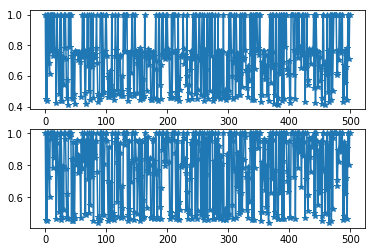

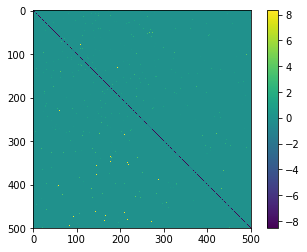

/home/runlab/.virtualenvs/cpulido/local/lib/python2.7/site-packages/numpy/linalg/linalg.py:2010: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Det:inf
[1.    0.451 1.    0.438 1.    0.767 0.686 0.615 1.    0.766 1.    1.
 0.73  1.    0.775 1.    0.756 0.771 0.426 1.    0.742 0.732 0.483 0.749
 1.    0.436 1.    0.725 0.438 0.722 0.544 1.    0.782 1.    0.713 0.457
 0.572 0.415 1.    1.    0.792 1.    1.    0.46  0.734 0.454 0.75  0.483
 0.418 0.763 0.744 0.755 0.757 0.755 0.705 0.732 0.756 0.692 0.464 0.76
 0.725 1.    0.728 1.    0.772 0.488 0.42  0.754 0.731 1.    0.664 1.
 0.505 0.775 0.446 1.    0.66  0.681 1.    0.46  0.739 0.743 0.718 0.781
 1.    0.688 0.485 0.429 0.472 0.449 1.    1.    1.    0.477 1.    0.751
 0.497 0.739 0.761 1.    1.    0.732 0.591 0.461 0.613 0.463 0.635 0.541
 0.47  1.    0.497 0.505 0.447 0.478 0.732 1.    0.768 0.729 0.508 1.
 0.482 0.725 0.735 0.731 0.471 0.501 0.602 0.468 1.    1.    0.755 0.763
 1.    1.    1.    0.438 0.515 0.748 0.485 0.468 0.763 0.619 1.    1.
 0.745 0.487 0.469 1.    0.764 0.738 0.688 0.49  0.714 0.773 0.726 0.443
 0.783 0.733 0.453 0.759 0.457 0.58  0.468 1.    0.729 0

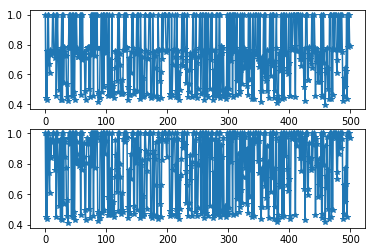

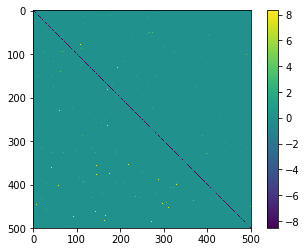

Det:inf
[1.    0.443 0.755 0.43  1.    1.    0.673 0.606 0.767 0.731 0.741 0.748
 1.    1.    0.756 0.75  0.71  1.    0.456 0.761 1.    0.729 0.493 0.717
 0.762 0.428 0.775 1.    0.431 1.    0.541 0.786 0.733 0.753 0.723 0.451
 0.535 0.42  0.781 1.    0.789 1.    0.779 0.453 1.    0.452 1.    0.484
 0.43  1.    0.742 1.    0.78  0.72  0.714 0.728 0.754 1.    0.463 1.
 0.699 1.    0.714 0.728 0.748 0.49  0.431 0.713 0.762 0.778 0.784 0.783
 0.503 0.736 0.451 1.    0.73  1.    1.    0.452 1.    1.    0.727 1.
 0.776 1.    0.481 0.416 0.466 0.443 0.775 0.785 1.    0.481 1.    1.
 0.516 1.    0.75  0.745 1.    1.    0.53  0.454 1.    0.461 0.699 0.552
 0.461 1.    0.459 0.523 0.44  0.476 0.645 0.76  0.752 0.705 0.559 1.
 0.48  1.    0.739 0.664 0.468 0.467 0.562 0.476 0.766 1.    1.    0.764
 1.    0.784 0.776 0.431 0.515 0.707 0.465 0.464 0.748 0.612 1.    0.776
 1.    0.497 0.471 0.744 0.763 0.739 1.    0.49  1.    0.766 0.746 0.435
 1.    0.755 0.453 0.719 0.451 0.573 0.452 1.    1.    

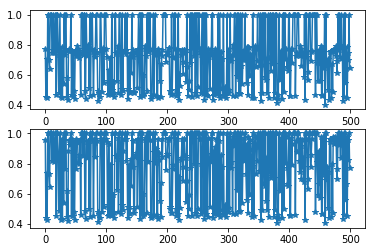

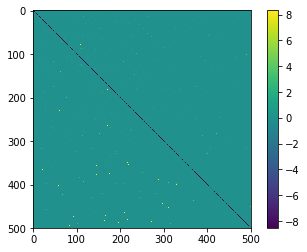

Det:inf
[0.771 0.45  0.705 0.441 1.    1.    0.697 0.638 1.    1.    1.    0.744
 0.762 1.    0.761 0.746 1.    1.    0.464 1.    1.    0.767 0.481 0.733
 1.    0.448 0.754 0.785 0.441 0.755 0.539 1.    0.734 1.    1.    0.453
 0.578 0.43  0.76  0.773 0.767 0.758 1.    0.462 0.76  0.456 0.755 0.491
 0.44  0.749 0.722 0.765 0.791 0.771 0.726 0.76  0.713 0.746 0.467 1.
 1.    1.    0.733 1.    1.    0.494 0.439 1.    0.763 0.725 0.796 0.769
 0.514 1.    0.457 0.773 1.    1.    0.751 0.464 0.767 0.716 0.748 1.
 1.    0.744 0.489 0.422 0.476 0.454 1.    1.    0.77  0.487 0.777 0.755
 0.545 1.    1.    1.    0.771 0.716 0.56  0.462 0.63  0.471 0.712 0.562
 0.474 1.    0.5   0.55  0.448 0.481 1.    1.    0.745 0.742 0.558 0.793
 0.478 1.    1.    0.761 0.466 0.506 1.    0.491 0.751 0.756 0.762 1.
 0.768 0.737 1.    0.437 0.504 0.719 0.494 0.477 0.747 0.613 1.    0.716
 0.763 0.483 0.475 0.745 0.752 0.747 0.752 0.509 0.769 1.    0.731 0.451
 1.    1.    0.464 1.    0.459 0.598 0.47  0.794 0.7

In [20]:
a=np.random.rand(len(vertices))
from matplotlib import cm
for i in range(5):
    a,M,s,val,vec=solve_1step(10,0.85,0.98,a,vertices,1)
    plt.subplot(2,1,1)
    plt.plot(a,'-*')
    plt.subplot(2,1,2)
    plt.plot(s,'-*')
    plt.show()
    plt.imshow(M)
    plt.colorbar()
    plt.show()
    
    
    print("Det:"+str(np.linalg.det(M)))
    print(np.around(a,3))
    print(np.around(s,3))
    print(np.around(val,3))
    print(np.around(vec,3))
    

In [ ]:
a=np.random.rand(len(vertices))
from matplotlib import cm
for i in range(5):
    a,M,s,val,vec=solve_1step(10,0.85,0.98,a,vertices,0.1)
    plt.subplot(2,1,1)
    plt.plot(a,'-*')
    plt.subplot(2,1,2)
    plt.plot(s,'-*')
    plt.show()
    plt.imshow(M)
    plt.colorbar()
    plt.show()
    
    
    print("Det:"+str(np.linalg.det(M)))
    print(np.around(a,3))
    print(np.around(s,3))
    print(np.around(val,3))
    print(np.around(vec,3))
    

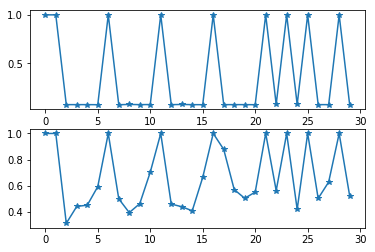

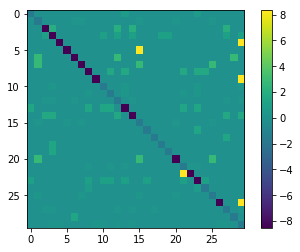

Det:95265653996876.23
[1.    1.    0.073 0.073 0.073 0.072 1.    0.072 0.075 0.073 0.074 1.
 0.073 0.075 0.073 0.072 1.    0.073 0.073 0.073 0.072 1.    0.075 1.
 0.075 1.    0.073 0.073 1.    0.073]
[1.    1.    0.315 0.443 0.453 0.594 1.    0.501 0.396 0.464 0.704 1.
 0.461 0.441 0.41  0.665 1.    0.878 0.572 0.505 0.552 1.    0.564 1.
 0.421 1.    0.505 0.629 1.    0.524]
[ -6.913  -6.132 -10.449 -10.239 -10.05   -9.857  -9.397  -8.893  -9.14
  -9.179  -8.728  -0.2    -0.247  -0.34   -2.284  -1.029  -1.127  -1.276
  -1.338  -1.981  -1.851  -1.519  -1.596  -1.616  -1.756  -1.743  -1.67
  -8.53   -8.53   -8.53 ]
[[ 0.128 -0.008 -0.002 -0.064  0.011  0.021 -0.     0.004 -0.    -0.
  -0.     0.183 -0.18   0.213 -0.001 -0.005  0.037 -0.029 -0.375  0.003
   0.108 -0.544  0.187  0.381  0.387 -0.059  0.     0.    -0.    -0.   ]
 [-0.    -0.004  0.    -0.     0.     0.     0.054 -0.    -0.     0.003
  -0.015  0.183  0.295  0.078  0.024  0.055  0.015  0.003 -0.004  0.571
   0.    -0.007 -0.01

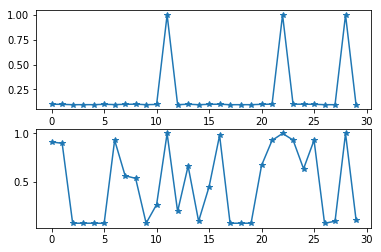

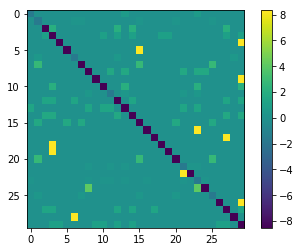

Det:9.373319366587954e+19
[0.1   0.099 0.095 0.096 0.096 0.099 0.096 0.099 0.1   0.096 0.098 1.
 0.095 0.1   0.095 0.099 0.1   0.095 0.095 0.095 0.099 0.101 1.    0.1
 0.1   0.099 0.096 0.095 1.    0.096]
[0.912 0.898 0.071 0.072 0.071 0.071 0.93  0.563 0.536 0.071 0.265 1.
 0.193 0.663 0.092 0.45  0.98  0.071 0.072 0.072 0.67  0.928 1.    0.932
 0.635 0.93  0.071 0.092 1.    0.109]
[-14.258  -0.2    -0.256  -0.504  -1.135  -1.34   -1.81   -1.915  -2.072
 -13.395 -13.34  -12.371 -11.704  -3.985  -5.043  -4.43   -5.903  -6.823
  -7.353 -10.354  -9.948 -10.1    -9.055  -8.756  -8.868  -8.844  -8.53
  -8.53   -8.53   -8.53 ]
[[ 0.002 -0.183 -0.181 -0.065 -0.022  0.615  0.623 -0.573  0.008 -0.004
   0.    -0.003 -0.022 -0.004 -0.011 -0.    -0.031  0.01  -0.047 -0.005
   0.037  0.002  0.    -0.    -0.001 -0.     0.    -0.    -0.    -0.   ]
 [ 0.    -0.183  0.307 -0.067  0.029  0.009 -0.004  0.01   0.623 -0.
  -0.002 -0.     0.    -0.001 -0.001  0.073 -0.     0.001  0.     0.001
   0.    -0.

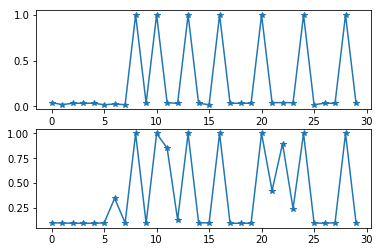

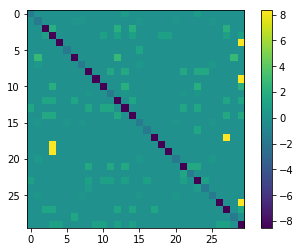

Det:3.1901403514958548e+16
[0.042 0.021 0.034 0.035 0.035 0.019 0.027 0.019 1.    0.035 1.    0.042
 0.033 1.    0.034 0.019 1.    0.034 0.035 0.035 1.    0.042 0.042 0.041
 1.    0.019 0.035 0.034 1.    0.035]
[0.098 0.097 0.093 0.094 0.094 0.097 0.346 0.097 1.    0.094 1.    0.853
 0.129 1.    0.1   0.097 1.    0.093 0.094 0.094 1.    0.424 0.897 0.242
 1.    0.097 0.094 0.099 1.    0.099]
[-14.277 -13.422 -12.417 -11.305 -11.077 -10.409 -10.321  -9.871  -8.069
  -8.243  -6.605  -5.323  -4.78   -3.958  -0.2    -0.246  -0.515  -2.524
  -2.274  -1.086  -1.971  -1.34   -1.304  -1.535  -1.58   -1.67   -1.67
  -8.53   -8.53   -8.53 ]
[[-0.004  0.006  0.004  0.023 -0.049  0.005 -0.004  0.004 -0.019  0.002
   0.003 -0.066 -0.091  0.02   0.183  0.241  0.102 -0.     0.001 -0.002
   0.003  0.224  0.011  0.666  0.172 -0.447  0.173  0.    -0.    -0.   ]
 [-0.001  0.001  0.003 -0.02  -0.007  0.     0.002  0.    -0.004 -0.031
   0.014 -0.003  0.004 -0.004  0.183 -0.187  0.005 -0.037  0.245 -0.094


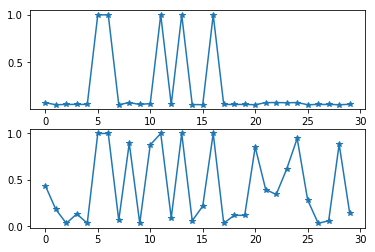

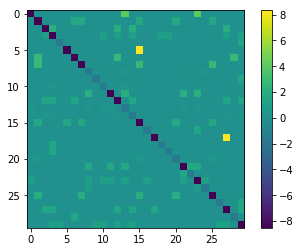

Det:1017471553476433.0
[0.077 0.057 0.059 0.06  0.059 1.    1.    0.057 0.079 0.059 0.069 1.
 0.059 1.    0.059 0.057 1.    0.059 0.059 0.059 0.057 0.078 0.08  0.077
 0.079 0.057 0.059 0.059 0.057 0.06 ]
[0.44  0.184 0.033 0.134 0.034 1.    1.    0.066 0.895 0.034 0.878 1.
 0.092 1.    0.061 0.218 1.    0.034 0.119 0.119 0.854 0.397 0.344 0.617
 0.946 0.284 0.034 0.06  0.884 0.146]
[-12.99  -12.581 -12.293 -11.298 -11.015 -10.746 -10.535 -10.083  -8.982
  -7.81   -7.954  -6.723  -5.965  -6.141  -3.862  -3.001  -0.2    -0.283
  -0.399  -2.18   -1.813  -1.086  -1.191  -1.348  -1.371  -1.477  -1.523
  -1.67   -1.67   -1.67 ]
[[-0.     0.002  0.004  0.794 -0.005  0.003 -0.038 -0.024  0.032  0.852
   0.048 -0.003 -0.535  0.005 -0.001 -0.    -0.183 -0.14  -0.115  0.217
  -0.159 -0.002  0.001  0.021  0.162  0.076  0.018  0.     0.    -0.   ]
 [-0.12  -0.075  0.43  -0.007 -0.12  -0.334  0.001 -0.46  -0.061  0.007
  -0.169  0.083  0.002  0.219  0.007 -0.27  -0.183  0.32  -0.173 -0.
  -0.    -0.

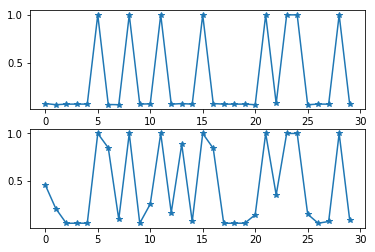

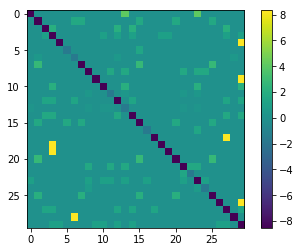

Det:5.0129942596280656e+19
[0.069 0.058 0.063 0.064 0.064 1.    0.059 0.057 1.    0.064 0.066 1.
 0.063 0.069 0.063 1.    0.07  0.063 0.064 0.064 0.057 1.    0.07  1.
 1.    0.057 0.064 0.063 1.    0.064]
[0.46  0.213 0.058 0.059 0.059 1.    0.849 0.1   1.    0.059 0.26  1.
 0.17  0.887 0.077 1.    0.844 0.058 0.059 0.059 0.148 1.    0.356 1.
 1.    0.154 0.059 0.077 1.    0.096]
[-14.257  -0.2    -0.296  -0.551  -1.148  -1.36   -1.5    -1.587  -1.869
  -2.028 -13.395  -3.988  -5.056  -6.13   -6.852  -7.765 -12.373 -12.542
 -11.536  -9.027 -10.077 -10.544 -10.339 -10.403 -10.407  -8.53   -8.53
  -8.53   -8.53   -8.53 ]
[[-0.025  0.183  0.137  0.056  0.002 -0.047 -0.105  0.063 -0.301  0.006
   0.053 -0.003 -0.033 -0.582  0.039 -0.66   0.052  0.001  0.682  0.001
  -0.005  0.002 -0.039  0.076  0.003  0.594 -0.051 -0.015 -0.03  -0.02 ]
 [-0.001  0.183 -0.318  0.139 -0.013 -0.003 -0.005  0.003 -0.024 -0.279
   0.001 -0.001 -0.001 -0.    -0.004  0.    -0.001  0.248 -0.002 -0.054
   0.22   0.

In [17]:
a=np.random.rand(len(vertices))
from matplotlib import cm
for i in range(5):
    a,M,s,val,vec=solve_1step(10,0.85,0.98,a,vertices,10)
    plt.subplot(2,1,1)
    plt.plot(a,'-*')
    plt.subplot(2,1,2)
    plt.plot(s,'-*')
    plt.show()
    plt.imshow(M)
    plt.colorbar()
    plt.show()
    
    
    print("Det:"+str(np.linalg.det(M)))
    print(np.around(a,3))
    print(np.around(s,3))
    print(np.around(val,3))
    print(np.around(vec,3))
    

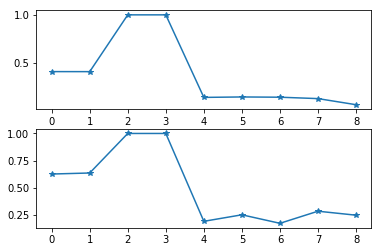

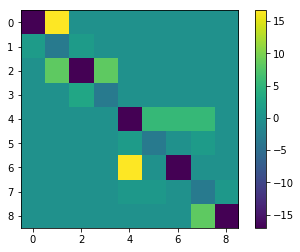

Det:-3845246.4643183667
[0.41  0.409 1.    1.    0.141 0.146 0.143 0.129 0.066]
[0.626 0.636 1.    1.    0.191 0.251 0.173 0.284 0.247]
[-20.    -17.901  -0.4    -2.499 -26.961  -0.639  -8.427  -4.2   -17.634]
[[-0.696 -0.89  -0.5   -0.444  0.     0.     0.     0.     0.   ]
 [ 0.123  0.045 -0.5   -0.388  0.     0.     0.     0.     0.   ]
 [-0.696  0.445 -0.5    0.222  0.     0.     0.     0.     0.   ]
 [ 0.123 -0.09  -0.5    0.776  0.     0.     0.     0.     0.   ]
 [ 0.     0.     0.     0.     0.51  -0.492  0.456  0.145 -0.002]
 [ 0.     0.     0.     0.    -0.03  -0.51  -0.116  0.707  0.007]
 [ 0.     0.     0.     0.    -0.859 -0.499  0.879  0.188  0.062]
 [ 0.     0.     0.     0.    -0.021 -0.445 -0.055 -0.559 -0.069]
 [ 0.     0.     0.     0.     0.017 -0.226 -0.053 -0.362  0.996]]


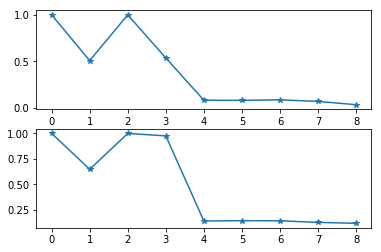

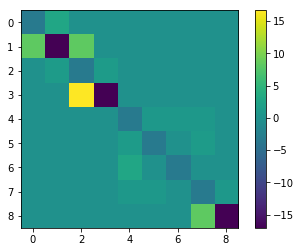

Det:-202997.79208513658
[1.    0.509 1.    0.538 0.085 0.082 0.088 0.072 0.036]
[1.    0.647 1.    0.976 0.138 0.142 0.14  0.125 0.116]
[ -0.4    -2.499 -20.    -17.901 -17.637  -0.544  -5.439  -2.574  -4.226]
[[ 0.5   -0.776 -0.123  0.09   0.     0.     0.     0.     0.   ]
 [ 0.5   -0.222  0.696 -0.445  0.     0.     0.     0.     0.   ]
 [ 0.5    0.388 -0.123 -0.045  0.     0.     0.     0.     0.   ]
 [ 0.5    0.444  0.696  0.89   0.     0.     0.     0.     0.   ]
 [ 0.     0.     0.     0.    -0.004  0.505  0.546 -0.216 -0.084]
 [ 0.     0.     0.     0.    -0.007  0.488 -0.329  0.292 -0.726]
 [ 0.     0.     0.     0.     0.001  0.531 -0.765 -0.829  0.28 ]
 [ 0.     0.     0.     0.     0.069  0.423 -0.076  0.368  0.522]
 [ 0.     0.     0.     0.    -0.998  0.213 -0.054  0.212  0.339]]


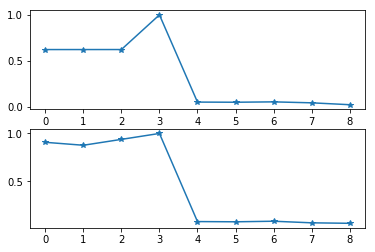

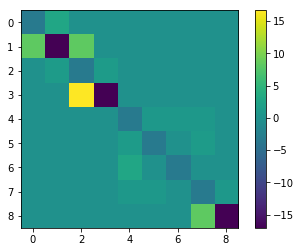

Det:-202997.79208513658
[0.622 0.622 0.622 1.    0.049 0.048 0.052 0.041 0.021]
[0.908 0.877 0.938 1.    0.082 0.08  0.086 0.07  0.064]
[ -0.4    -2.499 -20.    -17.901 -17.637  -0.544  -5.439  -2.574  -4.226]
[[ 0.5   -0.776 -0.123  0.09   0.     0.     0.     0.     0.   ]
 [ 0.5   -0.222  0.696 -0.445  0.     0.     0.     0.     0.   ]
 [ 0.5    0.388 -0.123 -0.045  0.     0.     0.     0.     0.   ]
 [ 0.5    0.444  0.696  0.89   0.     0.     0.     0.     0.   ]
 [ 0.     0.     0.     0.    -0.004  0.505  0.546 -0.216 -0.084]
 [ 0.     0.     0.     0.    -0.007  0.488 -0.329  0.292 -0.726]
 [ 0.     0.     0.     0.     0.001  0.531 -0.765 -0.829  0.28 ]
 [ 0.     0.     0.     0.     0.069  0.423 -0.076  0.368  0.522]
 [ 0.     0.     0.     0.    -0.998  0.213 -0.054  0.212  0.339]]


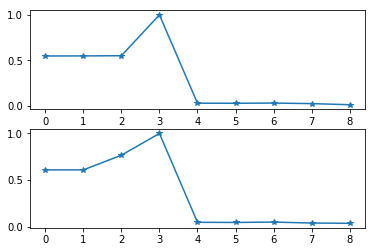

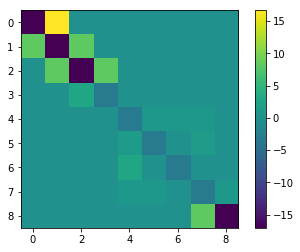

Det:-563441.0280159578
[0.548 0.549 0.551 1.    0.029 0.028 0.03  0.024 0.012]
[0.609 0.609 0.767 1.    0.048 0.046 0.05  0.04  0.037]
[-31.639 -18.159  -4.322  -0.4   -17.637  -0.544  -5.439  -2.574  -4.226]
[[-0.698 -0.703 -0.731  0.5    0.     0.     0.     0.     0.   ]
 [ 0.611  0.046 -0.559  0.5    0.     0.     0.     0.     0.   ]
 [-0.371  0.696 -0.124  0.5    0.     0.     0.     0.     0.   ]
 [ 0.039 -0.138  0.37   0.5    0.     0.     0.     0.     0.   ]
 [ 0.     0.     0.     0.    -0.004  0.505  0.546 -0.216 -0.084]
 [ 0.     0.     0.     0.    -0.007  0.488 -0.329  0.292 -0.726]
 [ 0.     0.     0.     0.     0.001  0.531 -0.765 -0.829  0.28 ]
 [ 0.     0.     0.     0.     0.069  0.423 -0.076  0.368  0.522]
 [ 0.     0.     0.     0.    -0.998  0.213 -0.054  0.212  0.339]]


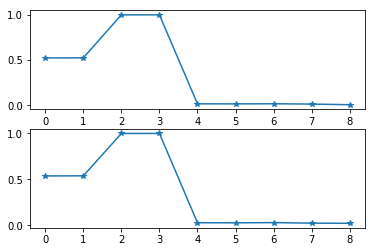

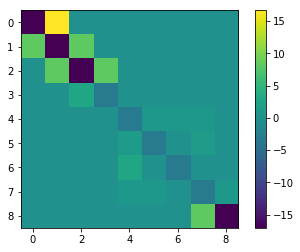

Det:-563441.0280159578
[0.524 0.525 1.    1.    0.017 0.016 0.017 0.014 0.007]
[0.537 0.538 1.    1.    0.028 0.027 0.029 0.023 0.022]
[-31.639 -18.159  -4.322  -0.4   -17.637  -0.544  -5.439  -2.574  -4.226]
[[-0.698 -0.703 -0.731  0.5    0.     0.     0.     0.     0.   ]
 [ 0.611  0.046 -0.559  0.5    0.     0.     0.     0.     0.   ]
 [-0.371  0.696 -0.124  0.5    0.     0.     0.     0.     0.   ]
 [ 0.039 -0.138  0.37   0.5    0.     0.     0.     0.     0.   ]
 [ 0.     0.     0.     0.    -0.004  0.505  0.546 -0.216 -0.084]
 [ 0.     0.     0.     0.    -0.007  0.488 -0.329  0.292 -0.726]
 [ 0.     0.     0.     0.     0.001  0.531 -0.765 -0.829  0.28 ]
 [ 0.     0.     0.     0.     0.069  0.423 -0.076  0.368  0.522]
 [ 0.     0.     0.     0.    -0.998  0.213 -0.054  0.212  0.339]]


In [131]:
a=np.random.rand(len(vertices))
from matplotlib import cm
for i in range(5):
    a,M,s,val,vec=solve_1step(20,0.85,0.98,a,vertices,1)
    plt.subplot(2,1,1)
    plt.plot(a,'-*')
    plt.subplot(2,1,2)
    plt.plot(s,'-*')
    plt.show()
    plt.imshow(M)
    plt.colorbar()
    plt.show()
    
    
    print("Det:"+str(np.linalg.det(M)))
    print(np.around(a,3))
    print(np.around(s,3))
    print(np.around(val,3))
    print(np.around(vec,3))
    

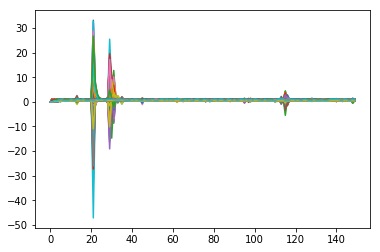

In [195]:
t=150
S=np.zeros((len(vertices),t))
S[:,0]=x_0
for i in range(1,t):
    S[:,i]=solve_1step(10,0.85,0.98,S[:,i-1],vertices)
plt.plot(S[0:].T)
plt.show()    

S.shape

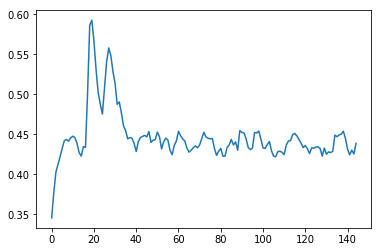

In [200]:
plt.plot(S[2][5:],'-')

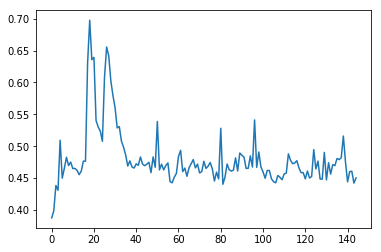

In [201]:
plt.plot(S[19][5:],'-')

In [204]:
vertices[19][1]

0

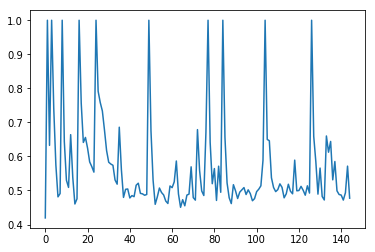

In [202]:
plt.plot(S[45][5:],'-')

In [203]:
vertices[45][1]

0.05

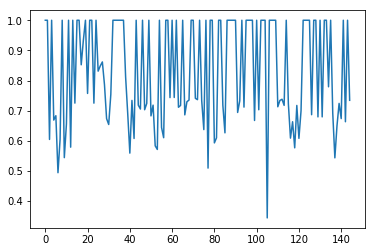

In [205]:
plt.plot(S[300][5:],'-')

In [206]:
vertices[300][1]

0.5